# **Novodra vs. Auralin: Analyzing the Best Option for HbA1c Reduction**

### **DATA SUMMARY:**
This dataset includes information on 500 patients, out of which 350 participated in a clinical trial. None of these patients were previously using Novodra (a well-known injectable insulin) or Auralin (the oral insulin being tested) as their primary insulin source. All patients had elevated HbA1c levels.

Initially, all 350 patients were treated with Novodra to establish baseline HbA1c levels and insulin doses. After 4 weeks, which is insufficient to fully observe the changes in HbA1c due to switching to Auralin or continuing with Novodra, the patients were divided as follows:

* 175 patients transitioned to Auralin for 24 weeks.
* 175 patients continued using Novodra for 24 weeks. Data on patients experiencing adverse effects is also recorded.

**Additional details:** Insulin resistance varies among individuals, making it necessary to record both the initial and final median daily doses to calculate the change in dosage. Testing drugs and medical products on the people they are intended to benefit is crucial. Clinical trials must include participants of different ages, races, sexes, and ethnic groups. This diversity is reflected in the patient dataset.

### **Table -> patients:**

* **patient_id:** A unique identifier for each patient in the pharmaceutical company’s Master Patient Index, which is producing Auralin.

* **assigned_sex:** The sex assigned to each patient at birth (male or female).

* **given_name:** The first name of each patient.
* **surname:** The last name of each patient.
* **address:** The primary address for each patient.
* **city:** The city associated with the patient's primary address.
* **state:** The state associated with the patient's primary address.
* **zip_code:**The postal code associated with the patient's primary address.
* **country:** The country associated with the patient's primary address (all patients are located in the United States for this clinical trial).
* **contact:** The phone number and email information for each patient.
* **birthdate:** The birthdate of each patient (month/day/year). The inclusion criteria for this clinical trial require participants to be 18 years or older, with no upper age limit due to the growing prevalence of diabetes among the elderly.
* **weight:** The weight of each patient in pounds (lbs).
* **height:** The height of each patient in inches (in).
* **bmi:** The Body Mass Index (BMI) of each patient, calculated using their height and weight. BMI = kg/m², where kg is the weight in kilograms and m² is height in meters squared. A BMI of 25.0 or higher is considered overweight, while a healthy range is 18.5 to 24.9. The inclusion criteria for this trial require a BMI between 16 and 38.

### **Table -> treatments and treatment_cut:**
* **given_name:** The first name of each patient in the Master Patient Index who participated in the clinical trial.
* **surname:** The last name of each patient in the Master Patient Index who participated in the clinical trial.
* **auralin:** The baseline median daily dose of insulin one week before switching to Auralin (number before the dash) and the ending median daily dose after 24 weeks of treatment (number after the dash). Both are measured in units (u), which is the standard international unit for insulin measurement.
* **novodra:** Similar to Auralin, but for patients who continued treatment with Novodra.
* **hba1c_start:** The patient’s HbA1c level at the beginning of the first week of treatment. HbA1c measures average blood sugar levels over the past three months and is a key indicator of diabetes control. It is recommended to be measured 2 to 4 times per year, with results expressed as a percentage.
* **hba1c_end:** The patient’s HbA1c level at the end of the final week of treatment.
* **hba1c_change:** The change in the patient’s HbA1c level from the start to the end of treatment, calculated as hba1c_start - hba1c_end. For Auralin to be considered effective, it must be "noninferior" to Novodra, the current insulin standard. Noninferiority is statistically defined as the upper limit of the 95% confidence interval for the difference between the mean HbA1c changes of Novodra and Auralin (Novodra minus Auralin) being less than 0.4%.

###**Table -> adverse_reactions:**
* **given_name:** The first name of each patient in the Master Patient Index who participated in the clinical trial and reported an adverse reaction.
* **surname:** The last name of each patient in the Master Patient Index who participated in the clinical trial and reported an adverse reaction.
* **adverse_reaction:** The adverse reaction reported by the patient. This includes reactions experienced by patients treated with both Auralin and Novodra.

# **Patients Table**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
data = pd.read_csv('/content/patients.csv')

In [ ]:
data.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [ ]:
data.shape

(503, 14)

In [ ]:
new_columns = ['ID', 'Gender', 'First_Name', 'Last_Name', 'Address', 'City', 'State', 'Postal_Code', 'Country', 'Contact', 'Date_of_Birth', 'Weight', 'Height', 'BMI']
data.columns = new_columns
data = data[['ID', 'First_Name', 'Last_Name', 'Gender', 'Country', 'State', 'City', 'Postal_Code', 'Address', 'Contact', 'Date_of_Birth', 'Weight', 'Height', 'BMI']]

In [ ]:
data['First_Name'] = data['First_Name'].str.lower()
data['Last_Name'] = data['Last_Name'].str.lower()

In [ ]:
data.head()

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI
0,1,zoe,wellish,female,United States,California,Rancho California,92390.0,576 Brown Bear Drive,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,pamela,hill,female,United States,Illinois,Armstrong,61812.0,2370 University Hill Road,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,jae,debord,male,United States,Nebraska,York,68467.0,1493 Poling Farm Road,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,liêm,phan,male,United States,NJ,Woodbridge,7095.0,2335 Webster Street,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,tim,neudorf,male,United States,AL,Dothan,36303.0,1428 Turkey Pen Lane,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             503 non-null    int64  
 1   First_Name     503 non-null    object 
 2   Last_Name      503 non-null    object 
 3   Gender         503 non-null    object 
 4   Country        491 non-null    object 
 5   State          491 non-null    object 
 6   City           491 non-null    object 
 7   Postal_Code    491 non-null    float64
 8   Address        491 non-null    object 
 9   Contact        491 non-null    object 
 10  Date_of_Birth  503 non-null    object 
 11  Weight         503 non-null    float64
 12  Height         503 non-null    int64  
 13  BMI            503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


**`Insights:`**
* **Total Rows:** 503 entries (patients).
* **Total Columns:** 14 attributes for each patient.

**`Data Types:`**
* **Numeric Columns:** int64 and float64 for numerical values.
* **Object Columns:**Contains strings or categorical data like names, addresses, and Gender.


**`Missing Address and Contact Information:`**

Some patients (12 entries) are missing address and contact details. If contact information is essential, these records need to be cleaned or addressed.

In [ ]:
data.describe()

,ID,Postal_Code,Weight,Height,BMI
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


**`Insights:`**
* **ID:** From above we can see there is an range from 1 to 503 which indicates there are total of 503 entries in the Patients table.
* **Postal_Code:** From the zip code column we can observe there are some missing values. leter we dlve deeper into this and resolve them in possible ways.
* **Weight:** The mean value of the weight is arround 173 which is in LBS and it is larger than ussual which may have some data entry issues or there can be some outliers in the data.
* **Height:** Heights are entered in inches, And this have a mean value of 66 inch. but the is minimum height of just 27 inch. which is unusual, may be having some data entry errors are there can be outliers.
* **BMI:** The data having mean bmi of arround 27 with standard deviation of 5.27 which indicates many people are overweight or obese.

In [ ]:
data.isnull().sum()   # checks for total null values.

,0
ID,0
First_Name,0
Last_Name,0
Gender,0
Country,12
State,12
City,12
Postal_Code,12
Address,12
Contact,12


/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


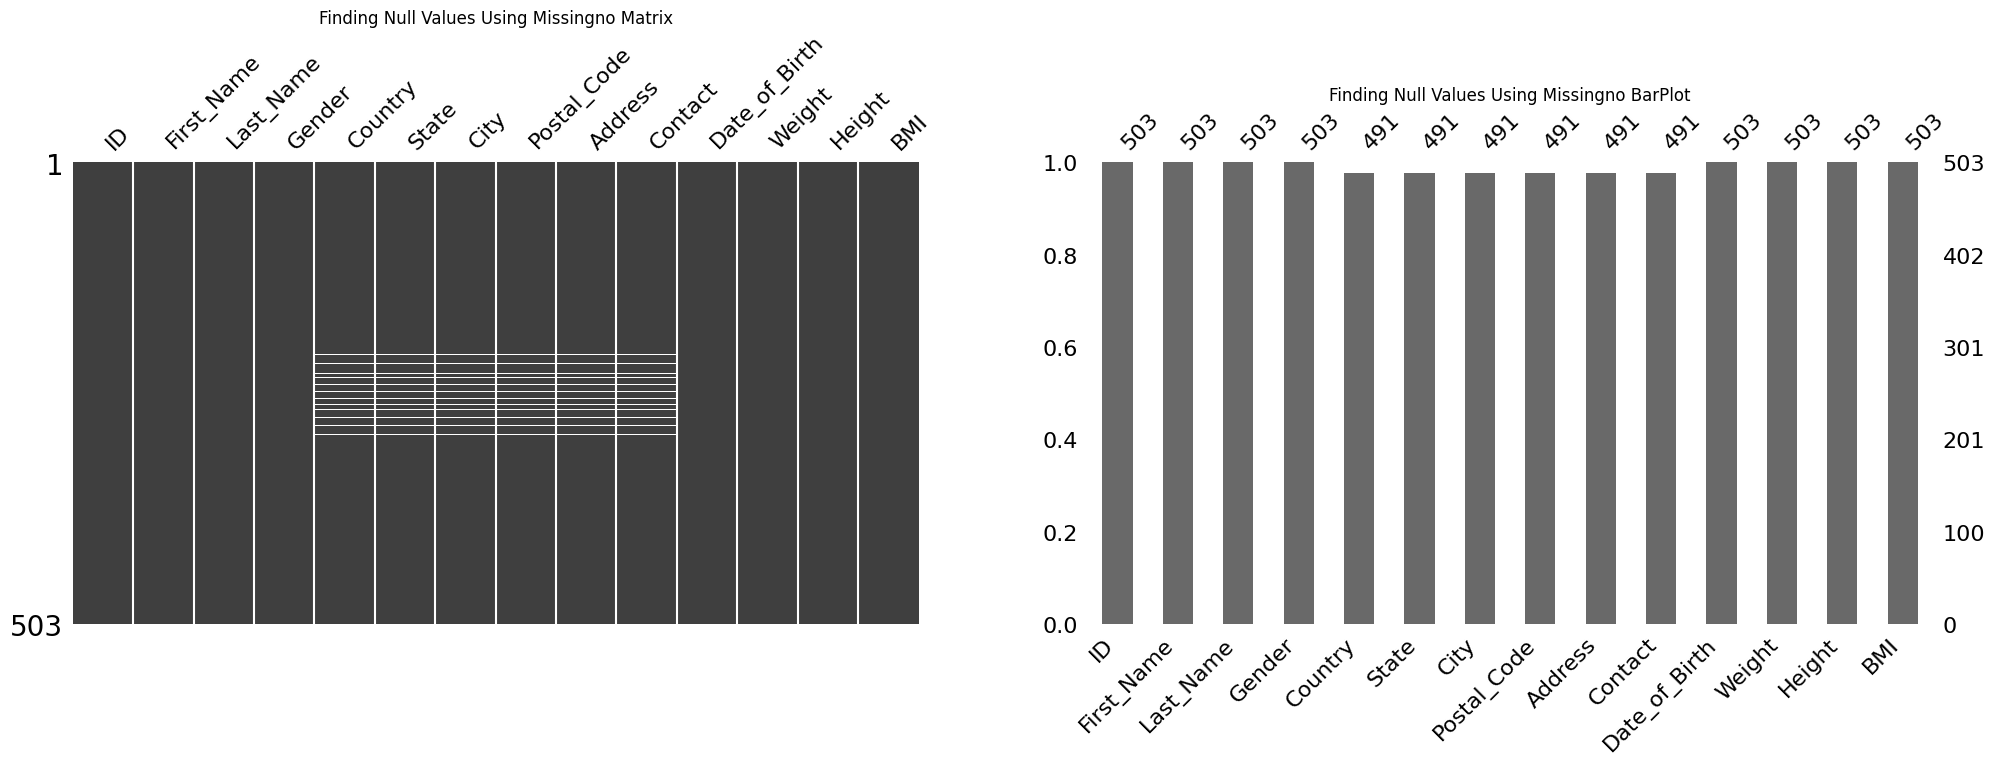

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (24, 6))
msno.matrix(data, ax = axes[0])
axes[0].set_title('Finding Null Values Using Missingno Matrix')
msno.bar(data, ax = axes[1])
axes[1].set_title('Finding Null Values Using Missingno BarPlot')
plt.show()

**`Insights on null values:`**
* The above result and plots indicates there are 12 null values in address column and personal details of the data.
* This may be due to unwilligness of the people or they have forgotten to enter this. we can replace or cap this later.
* As all the missing values are from categorical column this may be considered as MNAR. That is the missing data is not depended on any other values.


## **Checking and removing duplicated values from the data**

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Checks for the duplicates excluding patient_id
data[data.duplicated(subset =['First_Name', 'Last_Name', 'Gender', 'Country', 'State', 'City', 'Postal_Code', 'Country', 'Address', 'Contact', 'Date_of_Birth', 'Weight', 'Height', 'BMI'], keep = False)]

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI
215,216,john,doe,male,United States,NY,New York,12345.0,123 Main Street,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
229,230,john,doe,male,United States,NY,New York,12345.0,123 Main Street,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
237,238,john,doe,male,United States,NY,New York,12345.0,123 Main Street,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
244,245,john,doe,male,United States,NY,New York,12345.0,123 Main Street,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
251,252,john,doe,male,United States,NY,New York,12345.0,123 Main Street,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
277,278,john,doe,male,United States,NY,New York,12345.0,123 Main Street,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [ ]:
data.drop_duplicates(subset =['First_Name', 'Last_Name', 'Gender', 'Country', 'State', 'City', 'Postal_Code', 'Country', 'Address', 'Contact', 'Date_of_Birth', 'Weight', 'Height', 'BMI'], keep = 'first', inplace = True)

In [ ]:
data.shape

(498, 14)

**`Insights on Duplicates:`**
* At first it was indicating that there are no duplicates in the data. But it is not true as there is patiant_id in the data which is unique for each patient as it auto incremented and ordered data. so, exclude the patient_id from the command and search for the duplicates.
* Then i found that there are 5 duplicated values, which may harm my analysis. So, removing this from the data and make data clean for further analysis.
* Later I had removed the duplicated values from the data and made the data clean from duplicates.

## **Now let's eleminate null values by replacing them.**

In [ ]:
data[data['Address'].isnull()]

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI
209,210,lalita,eldarkhanov,female,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,mỹ,quynh,male,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,elisabeth,knudsen,female,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,martina,tománková,female,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,john,o'brian,male,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,benjamin,mehler,male,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,jin,kung,male,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,wafiyyah,asfour,female,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,flavia,fiorentino,female,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,generosa,cabán,female,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [ ]:
# here it can give future warning on the data types. so, let's change there datatypes to string.
data[['Country', 'State', 'City', 'Postal_Code', 'Address', 'Contact']] = data[['Country', 'State', 'City', 'Postal_Code', 'Address', 'Contact']].astype(str)

In [ ]:
# now same as address column let's eleminate all the other null values
data[['Country', 'State', 'City', 'Postal_Code', 'Address', 'Contact']].fillna('unknown', inplace = True)

<ipython-input-18-dc2e443be710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Country', 'State', 'City', 'Postal_Code', 'Address', 'Contact']].fillna('unknown', inplace = True)


In [ ]:
# Now check for the null values in the data
data.isnull().sum()

,0
ID,0
First_Name,0
Last_Name,0
Gender,0
Country,0
State,0
City,0
Postal_Code,0
Address,0
Contact,0


**`Insights on null values:`**
* The above code blocks shows there are 12 missing values from address, city,state, zip_code, country, contact and all are from same records of 12 patients.
* As i said before all the null values are from address and personal information columns this don't have any relation with other columns and all belongs same 12 patients, so these can be considered as missing not at random(MNAR).
* To resolve this i have choosen to replace this with some charecterized value, in this case it is `unknown` which makes some sence rather than null values.
* And then converted all the replaced columns to string type.
* At last, It indicates there are no null values in the data.

## **Now let's plot the distribution of the data among the gender, country, state.**

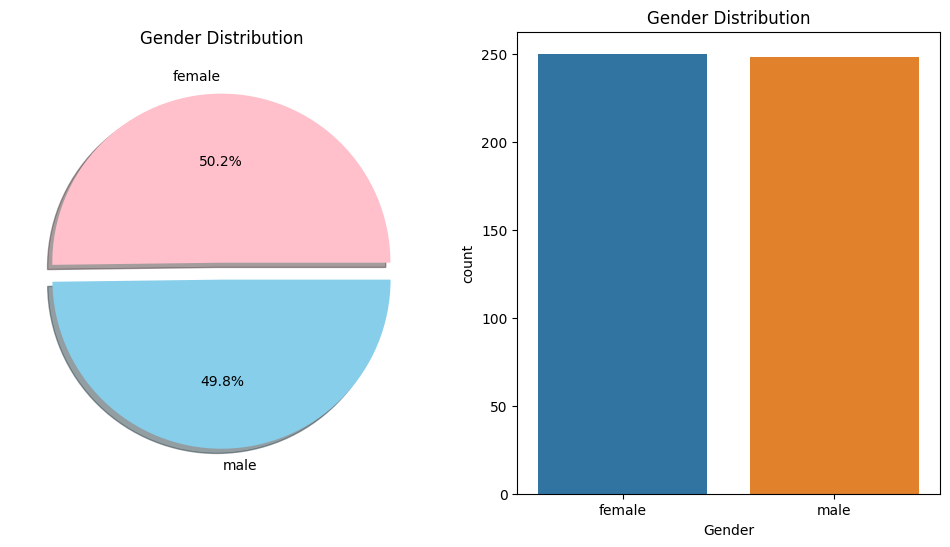

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
lab = data['Gender'].value_counts().index
axes[0].pie(data['Gender'].value_counts(), explode=[0, 0.1], autopct='%1.1f%%', shadow = True, colors = ['pink', 'skyblue'], labels=lab)
axes[0].set_title('Gender Distribution')
sns.countplot(data = data, x = 'Gender', hue = 'Gender')
axes[1].set_title('Gender Distribution')
sns.set_theme(style="darkgrid")
plt.show()

**`Insights:`**
* The above plots suggests the distribution of patients according to there gender in percentages and count.
* In this case the distribution is alomost equal among the genders of the patients.
* The above plots shows there are arround 250 patients of each gender, which exactly maches with our data.
* This makes our analysis better and this can be applied on any patient without including there gender into consideration.

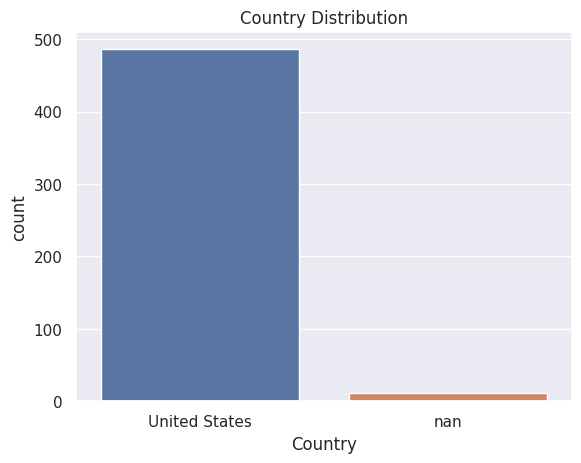

In [ ]:
sns.countplot(data = data, x = 'Country', hue = 'Country')
plt.title('Country Distribution')
plt.show()

**`Insights on Country:`**
- The above plot indicates the distribution of patients based on there countries. Here all the patients are from `United States(US)`.
- Before we had `replaced` the null values in country column with `'unknown'`. But it is now appropreiete way. we have to change this with united states instead of unknown.
- After Completion of the EDA we can replace this with United States.

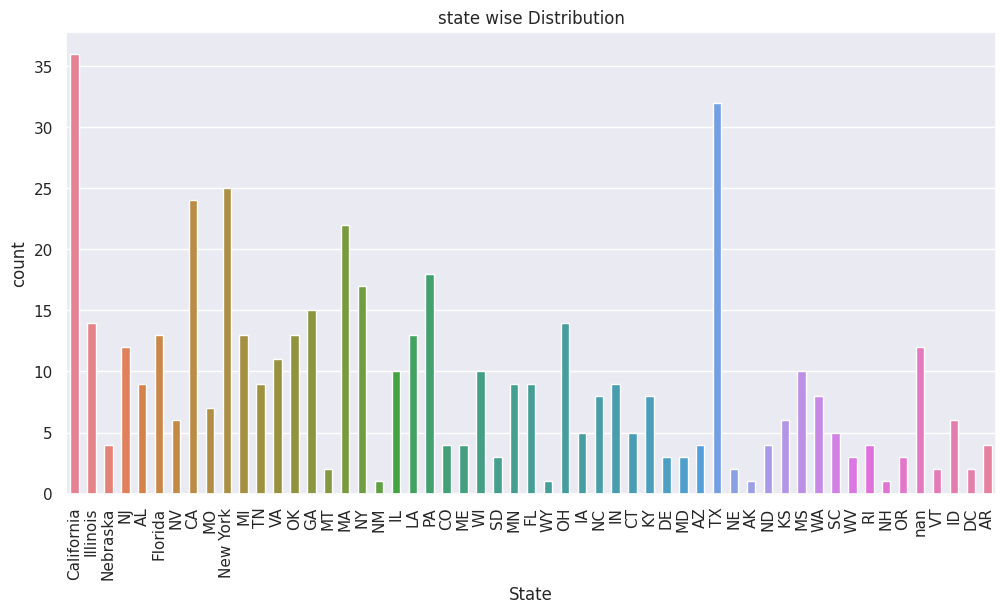

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data = data, x = 'State', hue = 'State', width = 0.5)
plt.title('state wise Distribution')
plt.xticks(rotation=90)
plt.show()

**`Insights on State Distribution:`**

* The above plot shows the distribution of patients across the states of `United States`.

* `California` has the `highest count` by far, with over `35 entries`, making it significantly overrepresented compared to `other states`.

* States like `New York, Texas, and Florida` show a notable presence, with counts ranging from `15 to 25`, indicating they are `well-represented` but not as much as `California`.

* Several states, such as `Idaho, Vermont, and Wyoming`` have very few occurrences, indicating underrepresentation in the dataset.

* There is a noticeable `nan` category, representing missing or unrecorded state information, which could indicate data quality issues or gaps in the dataset. These  Can be elemanted after the EDA of this data.

* The data shows an uneven distribution across states, with some regions like the `West Coast and Northeast` being more represented than others.

## **Categorizing the bmi into different categories**

In [ ]:
data['BMI'] = pd.to_numeric(data['BMI']) # this will convert my values in bmi to numerical values.

In [ ]:
def category(bmi):
  if bmi < 18.5:
      return 'Underweight'
  elif 18.5 <= bmi < 24.9:
      return 'Normal weight'
  elif 24.9 <= bmi < 29.9:
      return 'Overweight'
  elif 29.9 <= bmi < 34.9:
      return 'Obesity I'
  else:
      return 'Obesity II'

data['BMI_Category'] = data['BMI'].apply(category)

In [ ]:
data.head()

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI,BMI_Category
0,1,zoe,wellish,female,United States,California,Rancho California,92390.0,576 Brown Bear Drive,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,Normal weight
1,2,pamela,hill,female,United States,Illinois,Armstrong,61812.0,2370 University Hill Road,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,Normal weight
2,3,jae,debord,male,United States,Nebraska,York,68467.0,1493 Poling Farm Road,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,Normal weight
3,4,liêm,phan,male,United States,NJ,Woodbridge,7095.0,2335 Webster Street,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,Obesity I
4,5,tim,neudorf,male,United States,AL,Dothan,36303.0,1428 Turkey Pen Lane,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,Overweight


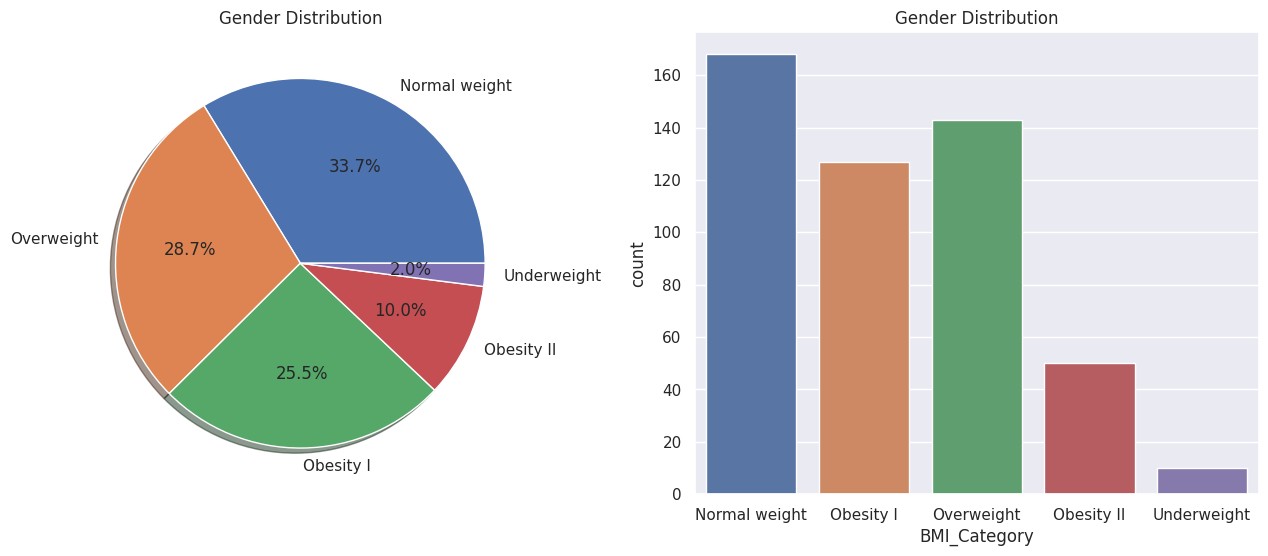

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
lab = data['BMI_Category'].value_counts().index
axes[0].pie(data['BMI_Category'].value_counts(), autopct='%1.1f%%', shadow = True, labels=lab)
axes[0].set_title('Gender Distribution')
sns.countplot(data = data, x = 'BMI_Category', hue = 'BMI_Category')
axes[1].set_title('Gender Distribution')
plt.show()

**`Insights on Gender:`**
- The above plots indicated the distribution of patients pased on the BMI category which is derived from there BMI's.
- These plots indicates there are more Normal Weight Patients. But while we consider obesity as one of the overweight category then there are more overweighted patients. Which is also seen from the description of this column before.
- Very less patients are falling under underweight category.
> Here's is brief description about bmi categories.
- BMI < 18.5: **Underweight** – Potential health risks due to insufficient body fat.
- 18.5 ≤ BMI < 24.9: **Normal Weight** – Generally considered healthy.
- 24.9 ≤ BMI < 29.9: **Overweight** – Increased risk of weight-related health issues.
- 29.9 ≤ BMI < 34.9: **Obesity I** – Significant health risks; potential for more severe complications.
- BMI ≥ 35.0: **Obesity II** – Severe obesity; high risk of serious health issues.



## **Creating an Age column using birthdate**
Since the patient data was collected from individuals who used `Novodra and Auralin` in current time, we should calculate their ages with respect to current year. Based on that we need to `create a column to reflect their ages` in current time.

In [ ]:
data['Date_of_Birth'] = pd.to_datetime(data['Date_of_Birth']) # It will convert the birthdate as datetime object
data['Age'] = 2019 - data['Date_of_Birth'].dt.year

In [ ]:
print(f'The minimum age is: {data["Age"].min()}\nThe maximum age is: {data["Age"].max()}')

The minimum age is: 20
The maximum age is: 98


In [ ]:
data.head()

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI,BMI_Category,Age
0,1,zoe,wellish,female,United States,California,Rancho California,92390.0,576 Brown Bear Drive,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6,Normal weight,43
1,2,pamela,hill,female,United States,Illinois,Armstrong,61812.0,2370 University Hill Road,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2,Normal weight,52
2,3,jae,debord,male,United States,Nebraska,York,68467.0,1493 Poling Farm Road,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8,Normal weight,39
3,4,liêm,phan,male,United States,NJ,Woodbridge,7095.0,2335 Webster Street,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7,Obesity I,68
4,5,tim,neudorf,male,United States,AL,Dothan,36303.0,1428 Turkey Pen Lane,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,27,26.1,Overweight,91


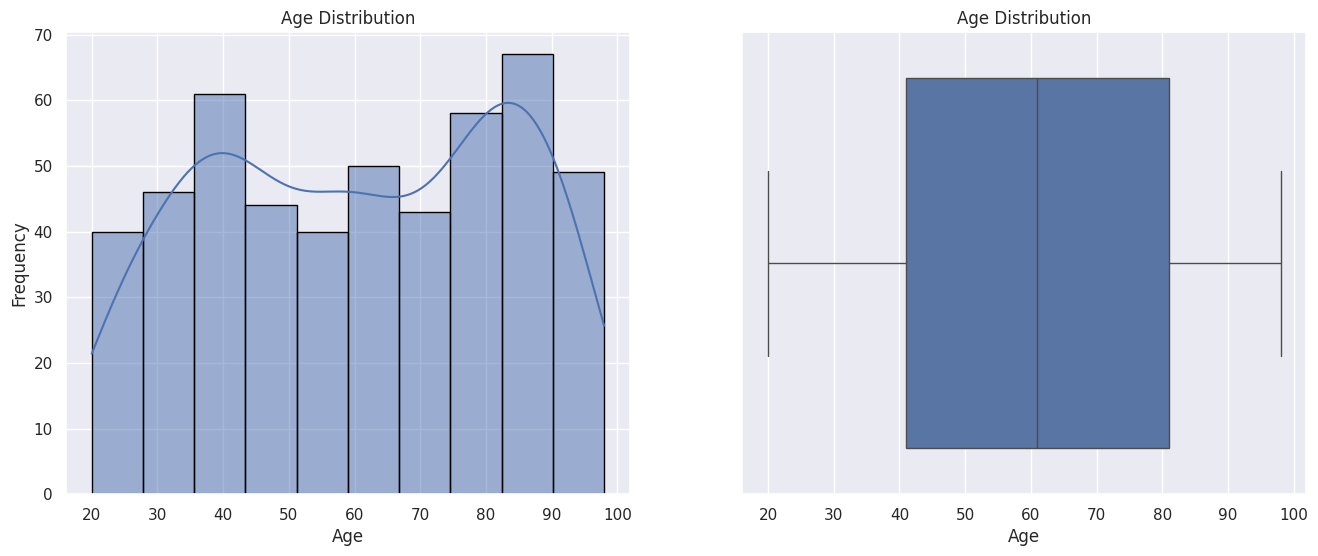

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
sns.histplot(data = data, x = 'Age', kde = True, edgecolor='black', ax = axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
sns.boxplot(data = data, x = 'Age', ax=axes[1])
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')
plt.show()

**`Insights on Ages of Patients:`**
- These plots shows the distribution of the patients with there ages in ranges from 1 to 80 splitting them into 10 equal parts.
- The plots suggests there are `mostly equal number` of distribution among the bins containing `ages of patient` from `30 - 100`.
- There are `more patients` of age between `80 to 90` which is arround 65.
- There are very less people from the ages below 30.
- And also there are `no outliers` in the age column.

### **Bi-Variete Analysis on Age**

### **Age vs BMI Categories**

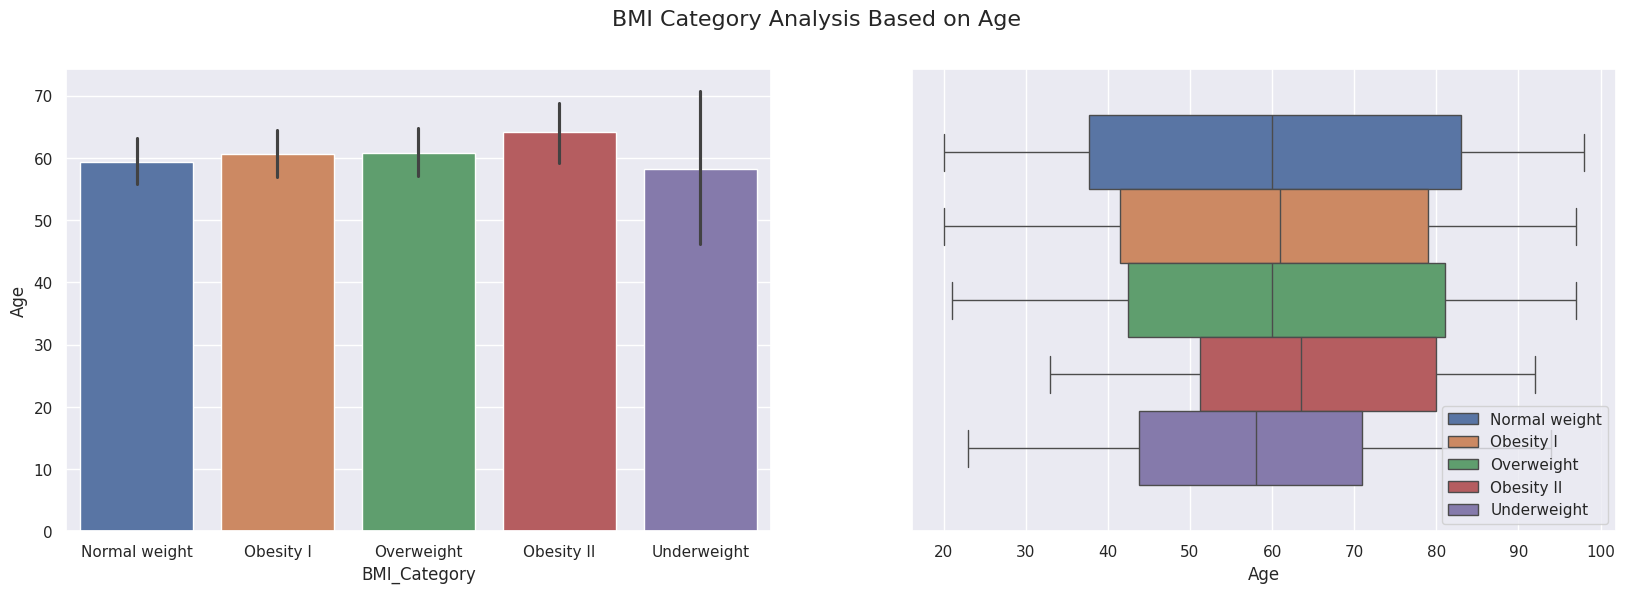

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(data = data, x = 'BMI_Category',  y = 'Age', hue = 'BMI_Category', ax = axes[0])
sns.boxplot(data = data, x = 'Age', hue = 'BMI_Category', ax = axes[1])
plt.legend(loc = 'lower right')
fig.suptitle('BMI Category Analysis Based on Age', fontsize=16)
plt.show()

**`Insights on BMI and Ages:`**
- Both the Above plots suggests that People having `normal weight` have wide range of age ditribution.
- While `Obesity-II` people are having `greater age` patients than that of other categories.
- And also their are `less number` of people in `underweight` category.
- We can somehow consider their is equal distribution in the spread of ages of the patients

### **Age vs Weight, Height, BMI**

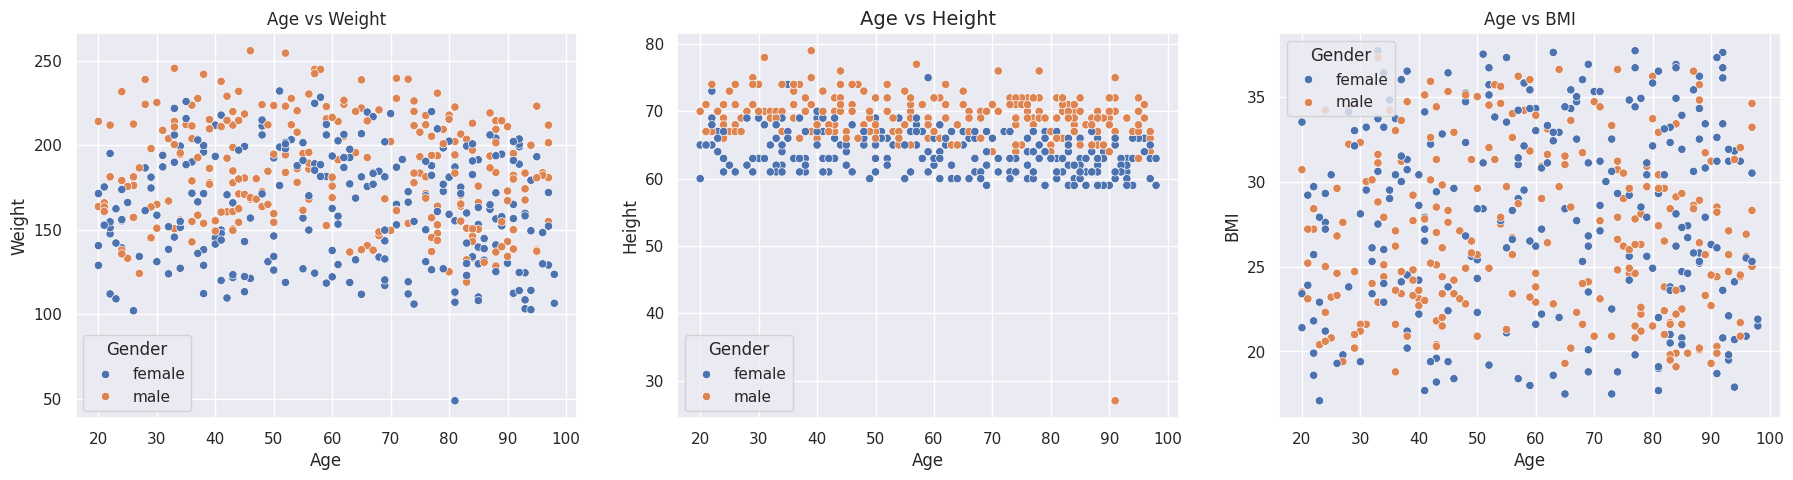

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
sns.scatterplot(data = data, x = 'Age', y = 'Weight', hue = 'Gender', ax = axes[0])
axes[0].set_title('Age vs Weight')
sns.scatterplot(data = data, x = 'Age', y = 'Height', hue = 'Gender', ax = axes[1])
axes[1].set_title('Age vs Height', fontsize = 14)
sns.scatterplot(data = data, x = 'Age', y = 'BMI', hue = 'Gender', ax = axes[2])
axes[2].set_title('Age vs BMI')
plt.show()

**`Insights on correlation of age:`**
- The Above plots indicates the relation between age and weight, height and bmi. each of this are divided with respect to other.
- Each point in these plots are plotted by taking the age and other category and the colours are differentiated based on there genders.

**`Age vs Weight:`**
- In this plot, the plotting is between age and weight the spread of the data is more as there are people with wide range of ages.
- Each point is plotted between age and weight as a distribution, And in this there is an point which may be outlier.

**`Age vs Height:`**
-  In this plot, the plotting is between age and height the spread is low and most of the points are starting from height of 60.
- We can see this distribution making an difference between male heights and femanle heights, And in this distribution also there is an point which may be an outlier.

**`Age vs BMI:`**
- This plot indicates the distribution of age with there BMI's where the points are spreded all over the plot and it is true, patientes can have any BMI.

### **BMI vs Weight, Height**

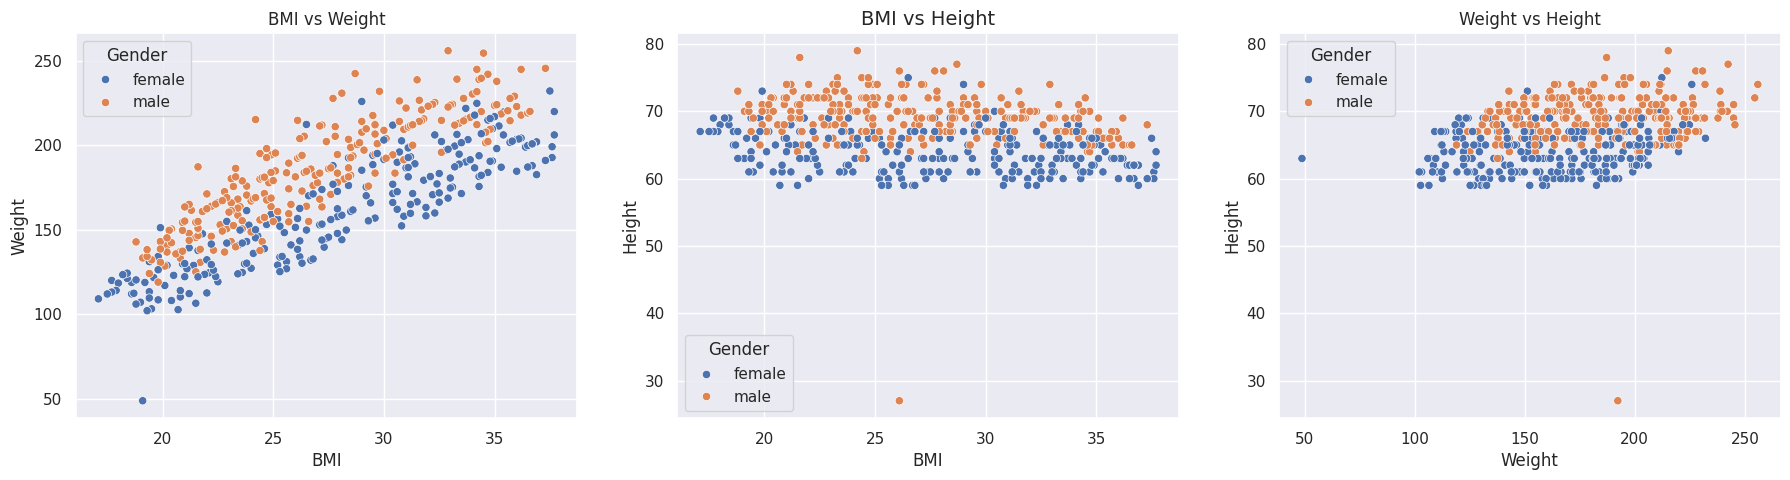

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
sns.scatterplot(data = data, x = 'BMI', y = 'Weight', hue = 'Gender', ax = axes[0])
axes[0].set_title('BMI vs Weight')
sns.scatterplot(data = data, x = 'BMI', y = 'Height', hue = 'Gender', ax = axes[1])
axes[1].set_title('BMI vs Height', fontsize = 14)
sns.scatterplot(data = data, x = 'Weight', y = 'Height', hue = 'Gender', ax = axes[2])
axes[2].set_title('Weight vs Height')
plt.show()

**`Insights on BMI:`**

**`BMI vs Weight (First Plot):`**

**Insight:** There is a strong positive correlation between BMI and weight. As weight increases, BMI also increases for both males and females.

**Gender Difference:** Males (orange) generally have higher weights for similar BMI values compared to females (blue), indicating that for the same BMI, males tend to weigh more.

**`BMI vs Height (Second Plot):`**

**Insight:** There is no strong correlation between BMI and height. This suggests that BMI is not significantly influenced by height alone.

**Gender Difference:** Males tend to have higher heights and higher BMIs compared to females. The males are spread more in the higher BMI and height range, while females are concentrated in the lower height and BMI range.

**`Weight vs Height (Third Plot):`**

**Insight:** There is a positive correlation between weight and height, especially for males. Taller individuals generally weigh more.

**Gender Difference:** Males (orange) tend to weigh more than females (blue) for a given height. Additionally, males cover a broader height range, while females are more concentrated in a slightly lower height range.

## **Outliers Detection on Weight, Height, Bmi**

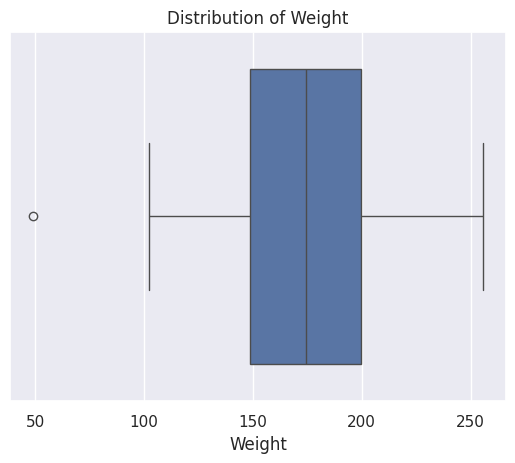

In [ ]:
# Let's check if there is any outliers in weight column.
sns.boxplot(data = data, x = 'Weight')
plt.title('Distribution of Weight')
plt.show()

In [ ]:
q1 = data['Weight'].quantile(.25)
q3 = data['Weight'].quantile(.75)
minimum = q1 - (1.5 * (q3-q1))
minimum

72.47499999999994

In [ ]:
data[data['Weight']<minimum]

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI,BMI_Category,Age
210,211,camilla,zaitseva,female,United States,OH,Wooster,44691.0,4689 Briarhill Lane,330-202-2145CamillaZaitseva@superrito.com,1938-11-26,48.8,63,19.1,Normal weight,81


- The `weights of the members are in lbs`, but for one person the weight is very low.
-  Looks like this is an `outlier`, as the `height` of the person is also `normal`.
> A `BMI of 18.5–24.9` is considered `normal` or `healthy for most women`. Even though healthcare professionals can use BMI as a screening tool, they shouldn’t use it as a method to evaluate a person’s body fat levels or health status ( 32 ). Keep in mind that health is much more than body weight or body composition.

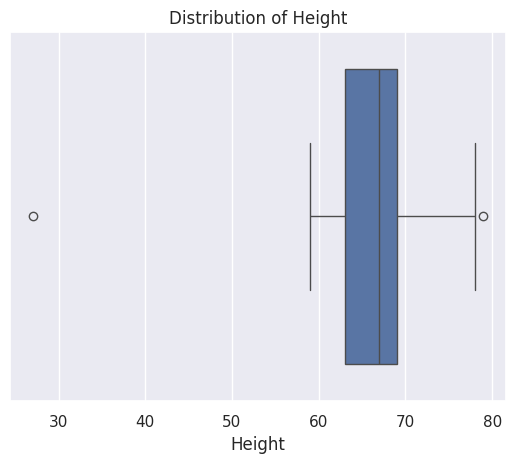

In [ ]:
# Let's check if there is any outliers in height column.
sns.boxplot(data = data, x = 'Height')
plt.title('Distribution of Height')
plt.show()

In [ ]:
q1 = data['Height'].quantile(.25)
q3 = data['Height'].quantile(.75)
minimum = q1 - (1.5 * (q3-q1))
minimum

54.0

In [ ]:
data[data['Height']<minimum]

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI,BMI_Category,Age
4,5,tim,neudorf,male,United States,AL,Dothan,36303.0,1428 Turkey Pen Lane,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,27,26.1,Overweight,91


- looks like this is an `outlier` as the `weight` of the person is `normal` and the `bmi` is little bit `over weight` in data by while `calculating` it should be `obesity`.
> Anything over `25 may indicate overweight`, while a `BMI lower than 18.5` may indicate `underweight`. It's important to keep in mind that other factors, such as `body composition` and `level of activity`, can affect the `accuracy of BMI` as an indicator of a healthy weight.




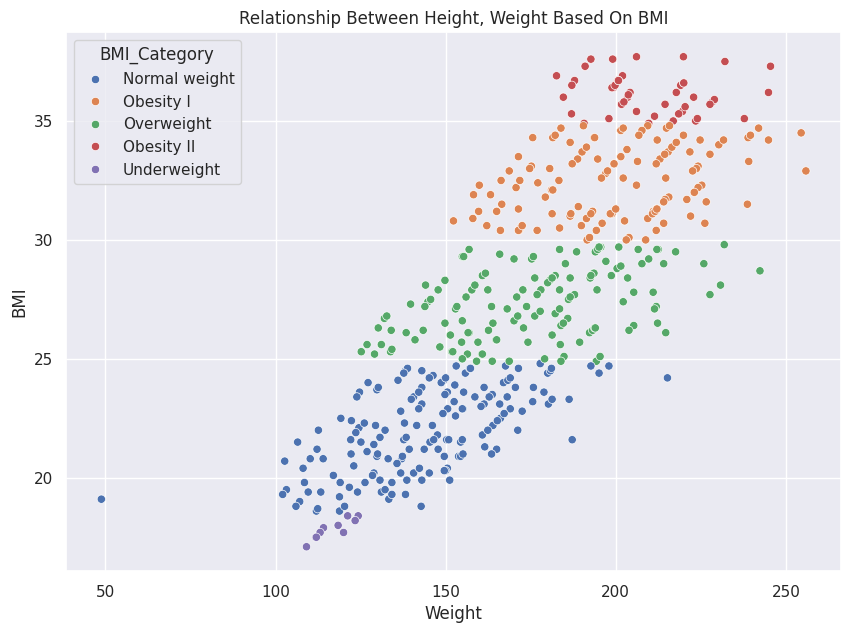

In [ ]:
#Let's Check it through bi-veriate analysis on heigh and weight attributes using scatterplot
plt.figure(figsize = (10, 7))
sns.scatterplot(data = data, x = 'Weight', y = 'BMI', hue = 'BMI_Category')
plt.title("Relationship Between Height, Weight Based On BMI")
plt.show()

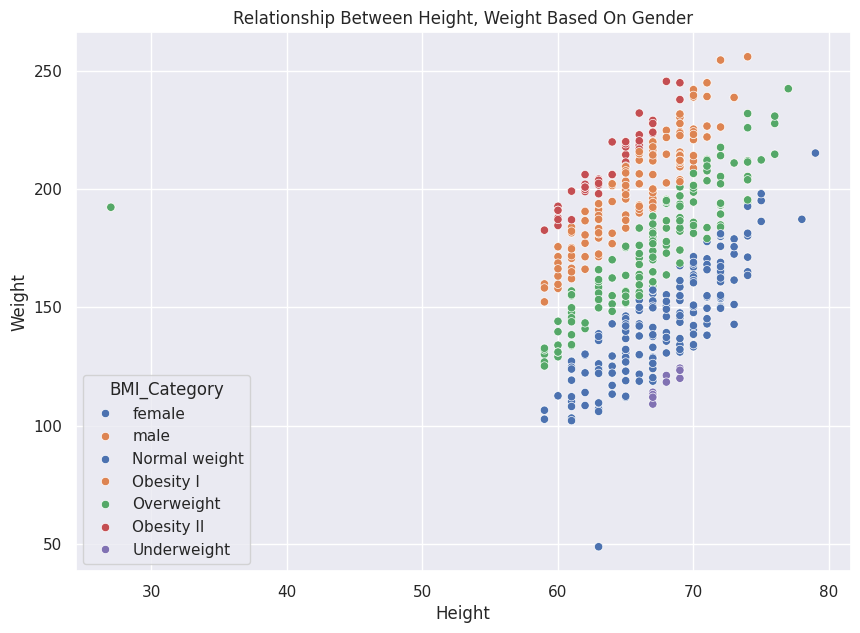

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = data, x = 'Height', y = 'Weight', hue = 'Gender')
sns.scatterplot(data = data, x = 'Height', y = 'Weight', hue = 'BMI_Category')
plt.title("Relationship Between Height, Weight Based On Gender")
plt.show()

**`Insights on 'Relationship Between Height, Weight Based On Gender':`**

Based on these two `scatterplots`, we can conclude that there are outliers in the data. These outliers are evident as they show individuals with a `normal BMI` but `abnormal weight and height`, making them `outliers`.

* `One female patient` has a `very low weight` compared to her `height and BMI`.
* `One male patient` has a significantly `lower height` compared to his `weight and BMI`.

To address these `outliers`, we can either `cap or remove` them from the dataset. Since there are only two outliers, `capping them` to their respective `minimum or maximum` values would be an effective approach.

### Outliers in BMI

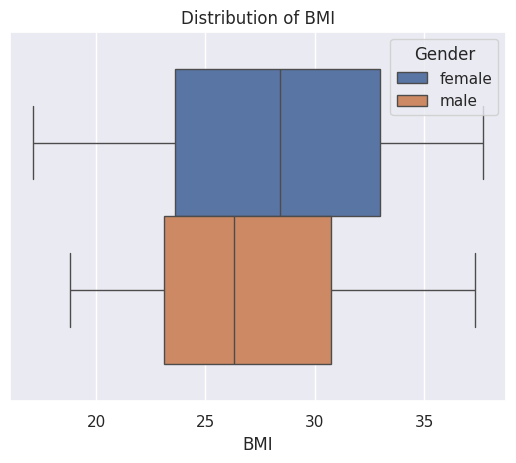

In [ ]:
sns.boxplot(data = data, x = 'BMI', hue = 'Gender')
plt.title('Distribution of BMI')
plt.show()

**`Insights:`**
- The above plot suggests there are `no outliers` in the bmi values of this data. So, `no need to change` anything in this data.
- As I mentioned before the BMI of patients is distributed from arround 23 to 33 by combining both male and female together.

## **Correlation between Weight, Height and BMI**

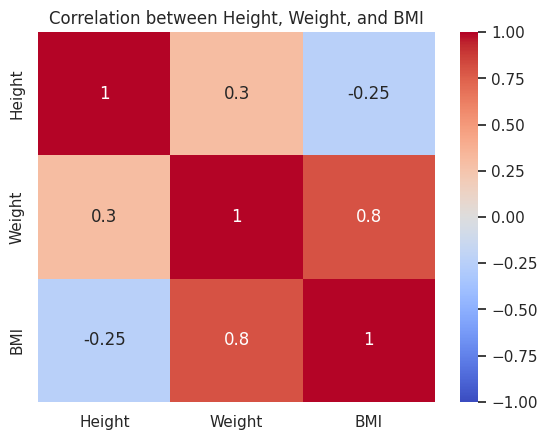

In [ ]:
corr = data[['Height', 'Weight', 'BMI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Height, Weight, and BMI')
plt.show()

**`Insights on correlation of BMI, weight and Height:`**

**Height vs. Weight:**

* Positive correlation (0.3), meaning taller individuals tend to weigh more, although the relationship is moderate.

**Weight vs. BMI:**

* Strong positive correlation (0.8), indicating that as weight increases, BMI tends to increase as well. This is expected since BMI is directly related to weight.

**Height vs. BMI:**

* Negative correlation (-0.25), showing that as height increases, BMI tends to decrease, assuming weight stays constant. Taller individuals often have lower BMI for the same weight.

**Summary:**

Weight has a stronger relationship with BMI than height, while height and BMI show an inverse trend. These correlations align with the expected mathematical relationships between these variables.

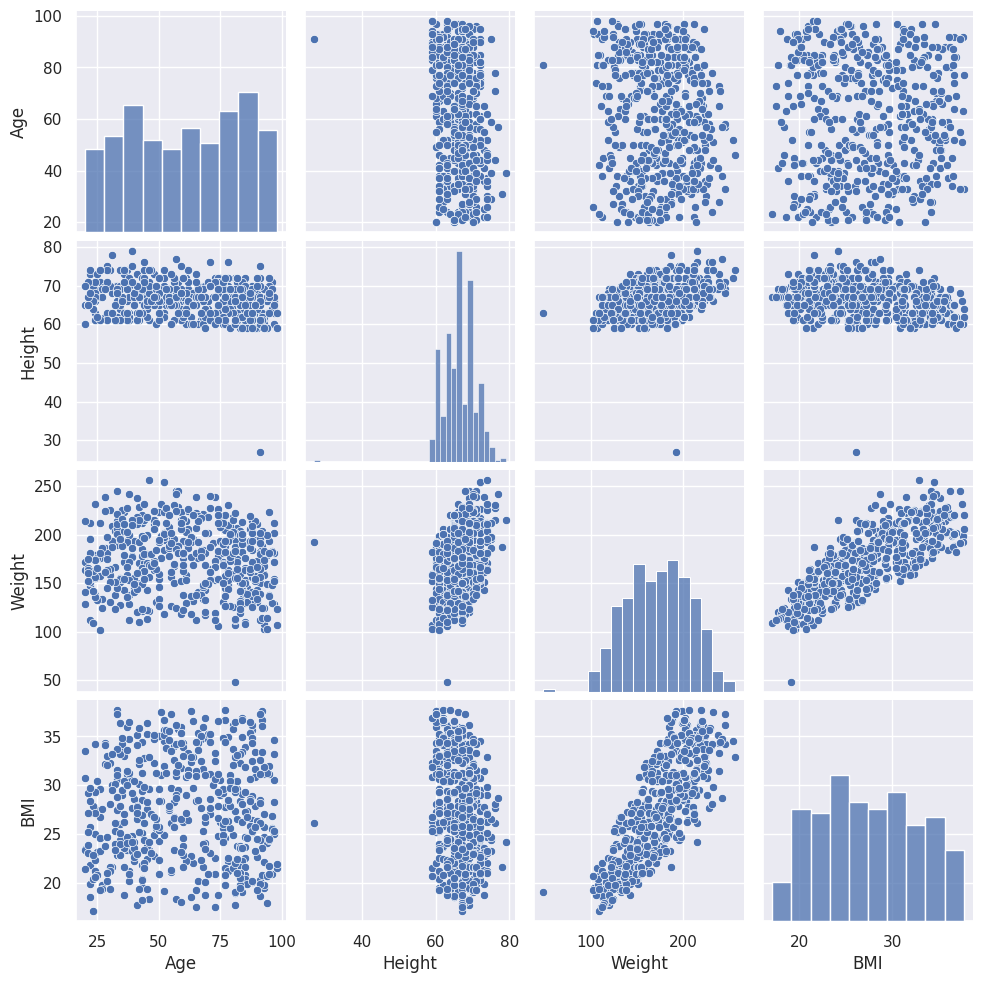

In [ ]:
sns.pairplot(data[['Age', 'Height', 'Weight', 'BMI']])

**`Insights on Age, Height, Weight and BMI:`**

**Age Distribution:** Most people are between 30 and 50 years old, but there are individuals from a wide range of ages.

**Height Distribution:** The majority of people have heights between 60 and 70 inches, with fewer very tall or short individuals.

**Weight Distribution:** Most people weigh between 100 and 250 pounds, with a peak around 150 to 200 pounds.

**BMI Distribution:** BMI values are mainly between 20 and 35, following a regular pattern.

**Height and Weight:** Taller individuals tend to weigh more, as expected.

**Weight and BMI:** People who weigh more usually have a higher BMI.

**Height and BMI:** Taller individuals generally have a lower BMI for the same weight.

**Outliers:** A few individuals have extreme values in weight or height compared to others.

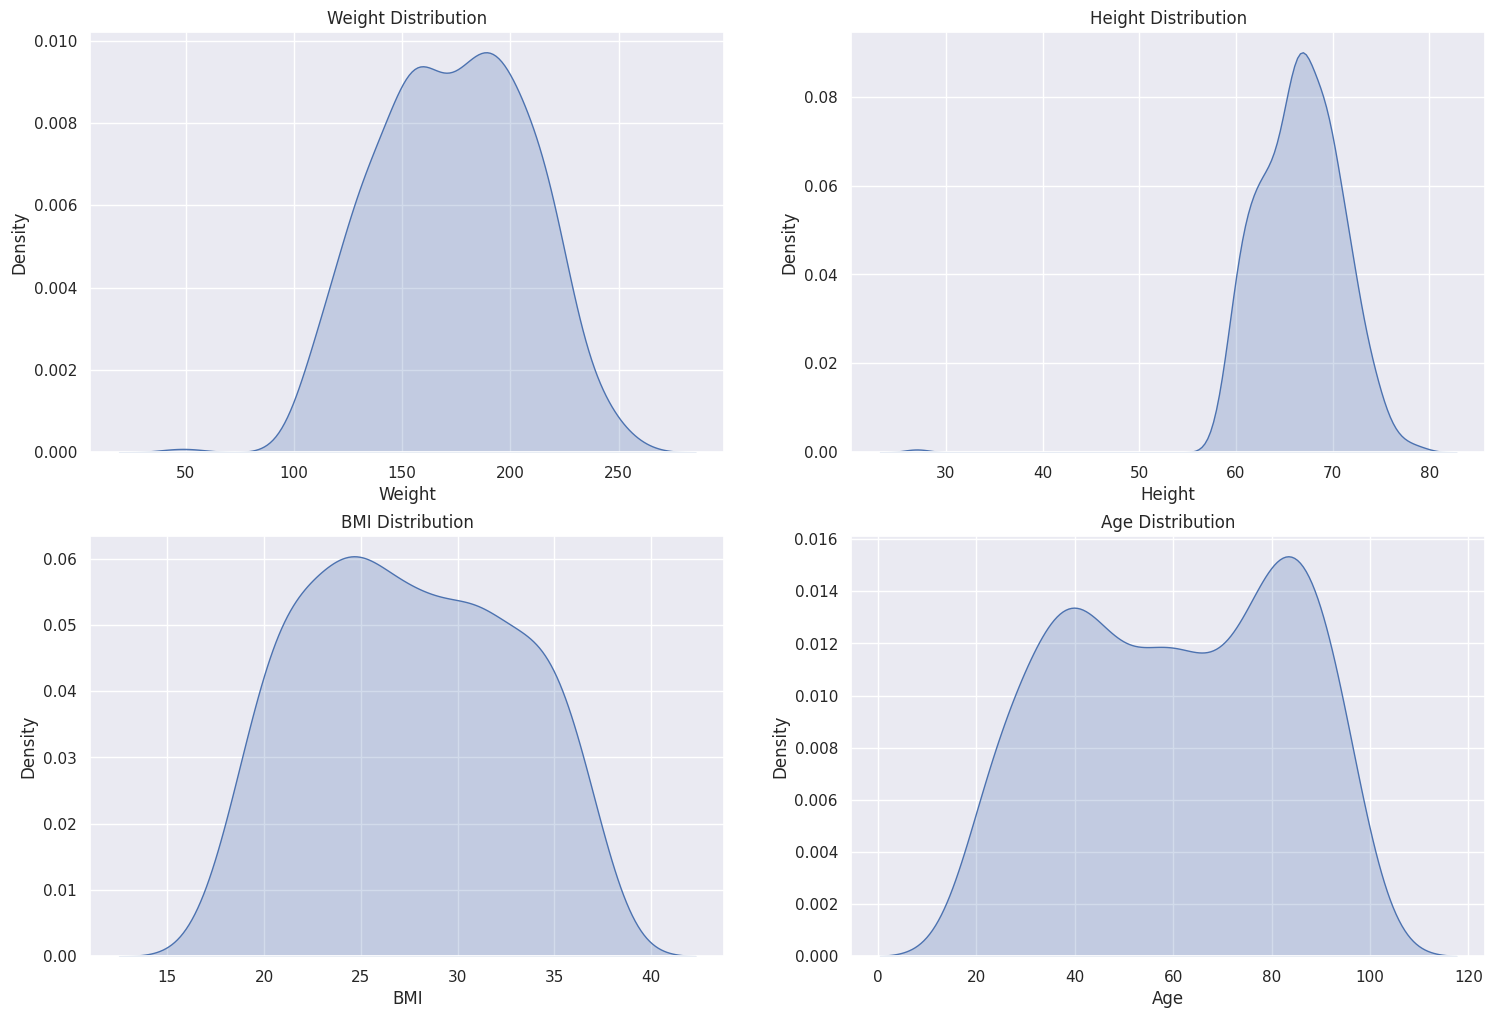

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
sns.kdeplot(data = data, x = 'Weight', fill = True, ax = axes[0][0])
axes[0][0].set_title('Weight Distribution')
sns.kdeplot(data = data, x = 'Height', fill = True, ax = axes[0][1])
axes[0][1].set_title('Height Distribution')
sns.kdeplot(data = data, x = 'BMI', fill = True, ax = axes[1][0])
axes[1][0].set_title('BMI Distribution')
sns.kdeplot(data = data, x = 'Age', fill = True, ax = axes[1][1])
axes[1][1].set_title('Age Distribution')
plt.show()

### **`Insights on type of Distributons:`**

**`Weight Distribution:`**

**Insight:** The distribution is unimodal, with most weights between 125 and 200 lbs, and a slight right skew, indicating fewer heavier individuals.

**Comparison:** This could resemble a skew-normal distribution, with most weights clustering around the mean and a tail toward higher weights.

**`Height Distribution:`**

**Insight:** Most individuals are around 65–70 inches tall, with a right skew, indicating a few shorter individuals.

**Comparison:** This resembles a truncated normal distribution, with a strong peak and tapering at the extremes, though slightly asymmetric.

**`BMI Distribution:`**

**Insight:** The BMI distribution has two peaks, indicating potential subpopulations, with most BMIs around 20–30 and fewer higher values.

**Comparison:** A bimodal Gaussian distribution may capture the two peaks, though it deviates from a standard normal shape.

**`Age Distribution:`**

**Insight:** The age distribution shows two peaks, around 20–30 and 60–70, suggesting two major age groups in the data.

**Comparison:** This can be modeled with a multimodal distribution, reflecting the distinct age clusters.

# **Treatments Table**

In [ ]:
treatments1 = pd.read_csv('/content/treatments.csv')

In [ ]:
treatments1.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [ ]:
treatments2 = pd.read_csv('/content/treatments_cut.csv')

In [ ]:
treatments2.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [ ]:
treatments = pd.concat([treatments1, treatments2], ignore_index=True)

In [ ]:
treatments.shape

(350, 7)

In [ ]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [ ]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 0 to 349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   First_Name     349 non-null    object 
 1   Last_Name      349 non-null    object 
 2   HBA1C_Start    349 non-null    float64
 3   HBA1C_End      349 non-null    float64
 4   HBA1C_Change   349 non-null    float64
 5   Drug_Category  349 non-null    object 
 6   Dose_Start     349 non-null    int64  
 7   Dose_End       349 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 24.5+ KB


**`Insight on treatments info:`**
- **First_Name and Last_Name:** These identify patients and contain 349 non-null string values, suggesting no missing data.
- **HBA1C_Start and HBA1C_End:** These float64 columns represent patients' HbA1c levels before and after treatment. The non-null values indicate complete records for all patients. Given the nature of HbA1c (a marker for long-term blood sugar control), these fields are critical for tracking treatment effectiveness.
- **HBA1C_Change:** This field calculates the difference between start and end HbA1c levels, providing a key measure of how much each patient’s blood sugar control improved (or worsened) after treatment.
- **Drug_Category:** A categorical field (object type) indicating the medication regimen each patient was prescribed. This column could be used to compare the efficacy of different treatments.
- **Dose_Start and Dose_End:** Represent the medication doses administered at the start and end of the treatment period. These integer fields allow for analysis of dose adjustments and their correlation with changes in HbA1c.

In [ ]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,350.000000,350.000000,213.000000
mean,7.956343,7.560057,0.540657
std,0.545328,0.545456,0.277417
min,7.500000,7.010000,0.200000
25%,7.650000,7.270000,0.340000
50%,7.785000,7.400000,0.380000
75%,7.950000,7.557500,0.920000
max,9.950000,9.580000,0.990000


**`Insight on Treatments:`**
- This dataset provides key statistics on HbA1c levels before and after treatment, along with the changes observed in those levels. The mean Hba1c start value is 7.96%, indicating that, on average, patients began with HbA1c levels in the pre-diabetic or diabetic range. After treatment, the mean Hba1c end value decreased to 7.56%, suggesting an average improvement in blood sugar control. The mean Hba1c change is 0.54%, with a maximum observed change of 0.99%.

- The standard deviation of both Hba1c start and end values is approximately 0.55%, indicating moderate variability among patients' HbA1c levels. The 25th to 75th percentile range (interquartile range) for Hba1c change is from 0.34% to 0.92%, implying that most patients saw a moderate reduction in their HbA1c levels.

- The minimum starting Hba1c value was 7.5%, and the maximum was 9.95%, meaning the dataset primarily consists of patients with elevated blood sugar levels. The reduction in HbA1c values post-treatment highlights the potential effectiveness of the treatments being administered, with a substantial percentage of patients seeing a significant improvement in their blood sugar control. However, not all patients achieved the same level of improvement, as seen from the variability in Hba1c change.

In [ ]:
new_columns = ['First_Name', 'Last_Name', 'Auralin', 'Novodra', 'HBA1C_Start', 'HBA1C_End', 'HBA1C_Change']
treatments.columns = new_columns

In [ ]:
treatments.head()

,First_Name,Last_Name,Auralin,Novodra,HBA1C_Start,HBA1C_End,HBA1C_Change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


## **Duplicates Treatment**

In [ ]:
treatments.duplicated().sum()

1

In [ ]:
treatments[treatments.duplicated()]

,First_Name,Last_Name,Auralin,Novodra,HBA1C_Start,HBA1C_End,HBA1C_Change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [ ]:
treatments[treatments['First_Name'] == 'joseph']

,First_Name,Last_Name,Auralin,Novodra,HBA1C_Start,HBA1C_End,HBA1C_Change
10,joseph,day,29u - 36u,-,7.70,7.19,NaN
136,joseph,day,29u - 36u,-,7.70,7.19,NaN
337,joseph,tucker,48u - 56u,-,7.67,7.30,0.37


- In the treatments dataset we found some duplicate values. lets drop the duplicated value.

In [ ]:
treatments.drop_duplicates(keep = 'first', inplace=True)

In [ ]:
treatments.duplicated().sum()

0

- Hence the `duplicate values are eleminated`. now, there are no duplicates in the data.

## **Handling Null values**

In [ ]:
treatments.isnull().sum()

,0
First_Name,0
Last_Name,0
Auralin,0
Novodra,0
HBA1C_Start,0
HBA1C_End,0
HBA1C_Change,136


In [ ]:
treatments[treatments['HBA1C_Change'].isna()] # It gives all the records having null values

,First_Name,Last_Name,Auralin,Novodra,HBA1C_Start,HBA1C_End,HBA1C_Change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN
10,joseph,day,29u - 36u,-,7.70,7.19,NaN
...,...,...,...,...,...,...,...
340,maret,sultygov,-,26u - 23u,7.67,7.30,NaN
342,fakhri,fakhoury,39u - 50u,-,7.83,7.39,NaN
343,žarka,rap,35u - 48u,-,7.54,7.15,NaN
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN


- All the `null values are from hba1c_change`. So, let's modify this column with appropriate values in it.

In [ ]:
treatments['HBA1C_Change'] = treatments['HBA1C_Start'] - treatments['HBA1C_End'] # it create new column.

In [ ]:
treatments.head()

,First_Name,Last_Name,Auralin,Novodra,HBA1C_Start,HBA1C_End,HBA1C_Change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


- Therefore there are `no null values and duplicated values` in the data.

In [ ]:
def catz(Auralin):
  if Auralin == '-':
    return 'novodra'
  else:
    return 'auralin'

treatments['Drug_Category'] = treatments['Auralin'].apply(catz)


- Hence `new category column` is added to the data which discribes the type of drug that patient uses.

In [ ]:
def extract_doses(row):
    if row['Auralin'] != '-':
        start_dose, end_dose = row['Auralin'].split(' - ')
    else:
        start_dose, end_dose = row['Novodra'].split(' - ')
    return pd.Series([start_dose[:2], end_dose[:2]])
treatments[['Dose_Start', 'Dose_End']] = treatments.apply(extract_doses, axis=1)
treatments.drop(columns=['Auralin', 'Novodra'], inplace = True)

In [ ]:
treatments[['Dose_Start', 'Dose_End']] = treatments[['Dose_Start', 'Dose_End']].astype(int)

In [ ]:
treatments.head()

,First_Name,Last_Name,HBA1C_Start,HBA1C_End,HBA1C_Change,Drug_Category,Dose_Start,Dose_End
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48
1,elliot,richardson,7.56,7.09,0.47,novodra,40,45
2,yukitaka,takenaka,7.68,7.25,0.43,novodra,39,36
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36
4,alissa,montez,7.78,7.46,0.32,novodra,33,29


In [ ]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 0 to 349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   First_Name     349 non-null    object 
 1   Last_Name      349 non-null    object 
 2   HBA1C_Start    349 non-null    float64
 3   HBA1C_End      349 non-null    float64
 4   HBA1C_Change   349 non-null    float64
 5   Drug_Category  349 non-null    object 
 6   Dose_Start     349 non-null    int64  
 7   Dose_End       349 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 24.5+ KB


## **Drug Category**

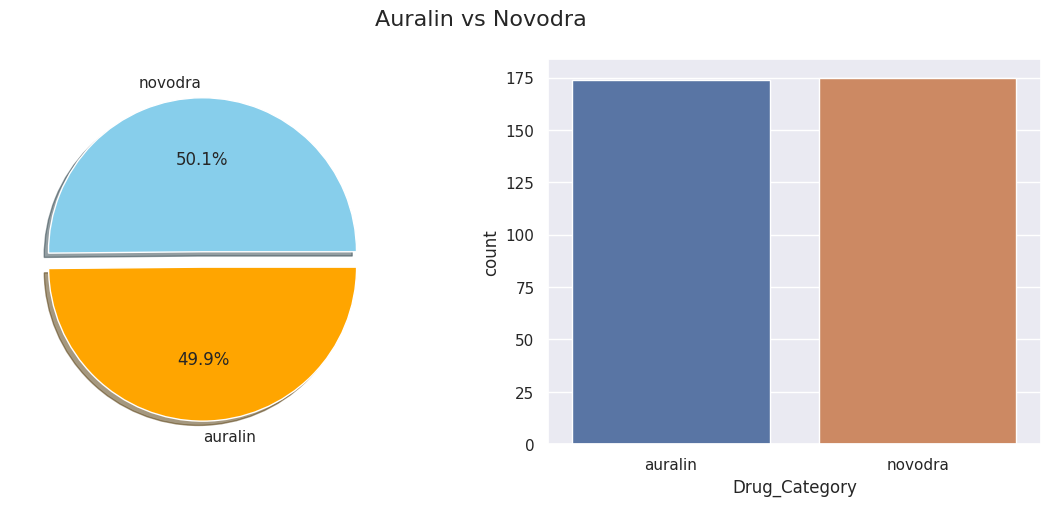

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
lab = treatments['Drug_Category'].value_counts().index
axes[0].pie(treatments['Drug_Category'].value_counts(), explode=[0, 0.1], autopct='%1.1f%%', shadow = True, colors = ['skyblue', 'orange'], labels=lab)
sns.countplot(data = treatments, x = 'Drug_Category', hue = 'Drug_Category', ax = axes[1])
fig.suptitle('Auralin vs Novodra', fontsize = 16)
plt.show()

- The above plots suggests that there is `equal distribution` among type of drugs.

### **hba1c Start and End on Drug Type**

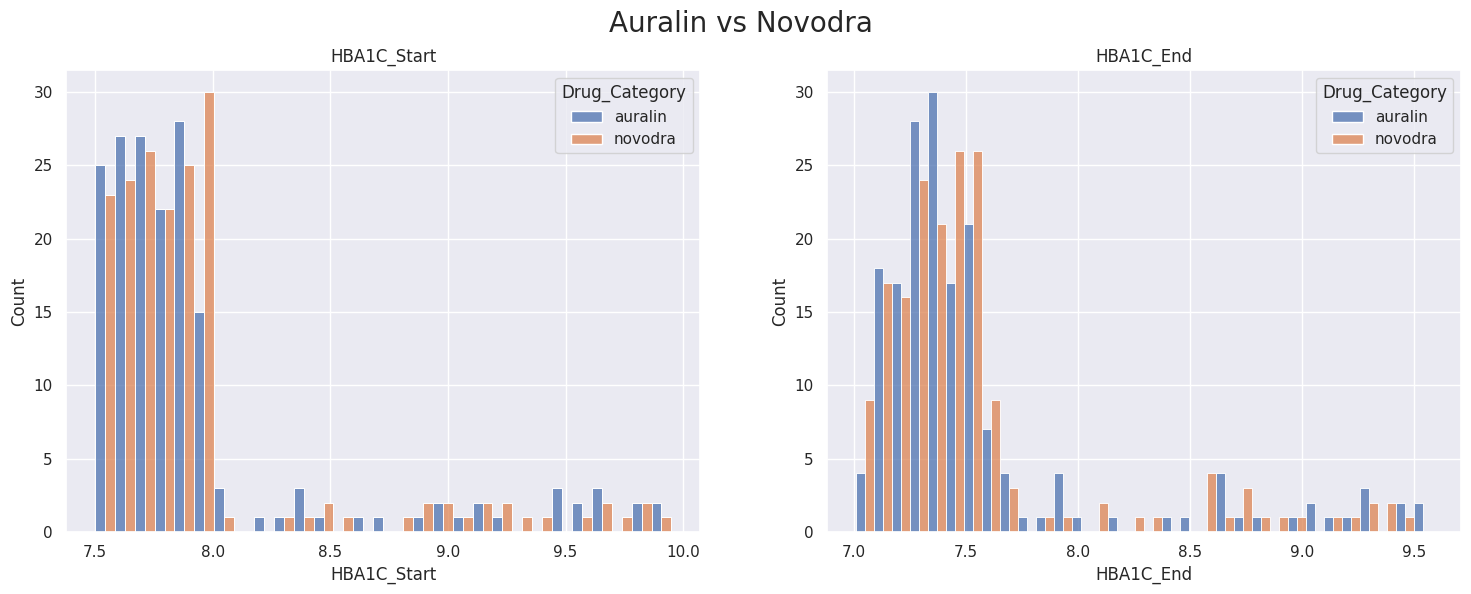

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data = treatments, x = 'HBA1C_Start', hue = 'Drug_Category', ax = axes[0], multiple = 'dodge')
axes[0].set_title('HBA1C_Start', fontsize = 12)
sns.histplot(data = treatments, x = 'HBA1C_End', hue = 'Drug_Category', ax = axes[1], multiple = 'dodge')
axes[1].set_title('HBA1C_End', fontsize = 12)
fig.suptitle('Auralin vs Novodra', fontsize = 20)
plt.show()

**`Insights on hba1c Start and End:`**

**HbA1c Start:**
* Both Auralin and Novodra show similar distributions at the start of the treatment.
* Most patients had HbA1c levels between 7.5 and 8.0, with fewer patients having higher levels.
* Novodra has a slightly higher count in the 8.0–8.5 range, while Auralin dominates at the 7.5–8.0 range.

**HbA1c End:**

* After treatment, the distribution shifts leftward, indicating a reduction in HbA1c levels for both drugs.
* The range of 7.0–7.5 has the highest counts for both drugs, with Auralin having a slightly higher concentration of patients.
* Fewer patients remained at higher HbA1c levels (above 8.0), showing a general improvement for both drug regimens.

### **HBA1C Change on Drug Type**

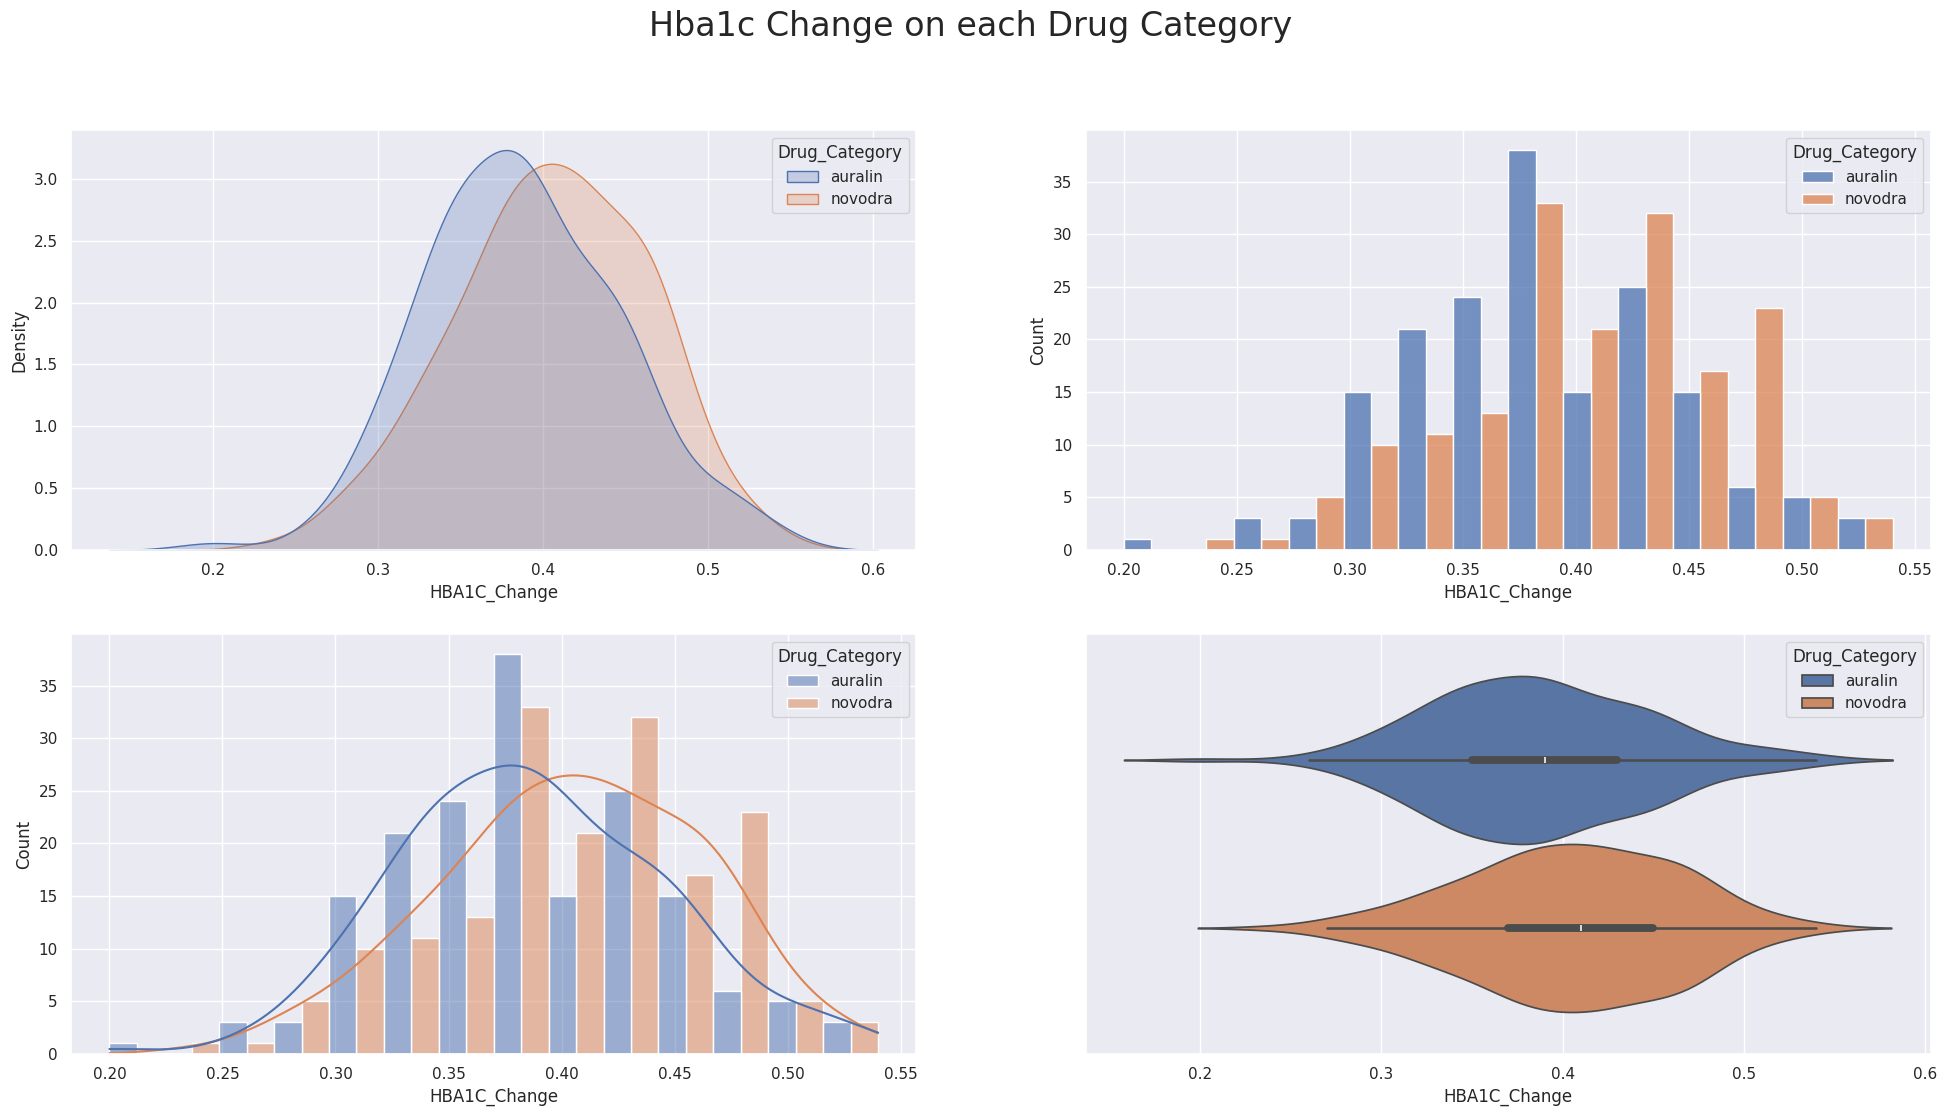

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(24, 12))
sns.kdeplot(data = treatments, x = 'HBA1C_Change', hue = 'Drug_Category', fill = True, ax = axes[0][0])
sns.histplot(data = treatments, x = 'HBA1C_Change', hue = 'Drug_Category', ax = axes[0][1], multiple = 'dodge')
sns.histplot(data = treatments, x = 'HBA1C_Change', kde = True, hue = 'Drug_Category', ax = axes[1][0], multiple = 'dodge')
sns.violinplot(data = treatments, x = 'HBA1C_Change', hue = 'Drug_Category', ax = axes[1][1])
fig.suptitle('Hba1c Change on each Drug Category', fontsize = 24)
plt.show()

**`Insights on hba1c change on each drug category:`**
- Based on the analysis, the plots suggests that patients using `Novodra` show a `greater average` change in HbA1c compared to those using `Auralin`. This observation indicates that, on average, Novodra might be associated with a `more significant reduction in HbA1c levels`.
- However, this `does not conclusively prove that Novodra cures or reduces diabetes more effectively than Auralin`, as several factors could influence the observed change in HbA1c. These factors include variations in individual patient responses, the specific dosage and duration of treatment, and other underlying health conditions.
- Further research, including controlled `clinical trials and additional statistical analysis`, is needed to confirm whether Novodra is genuinely more effective than Auralin in managing diabetes.

## **Outliers Detection**

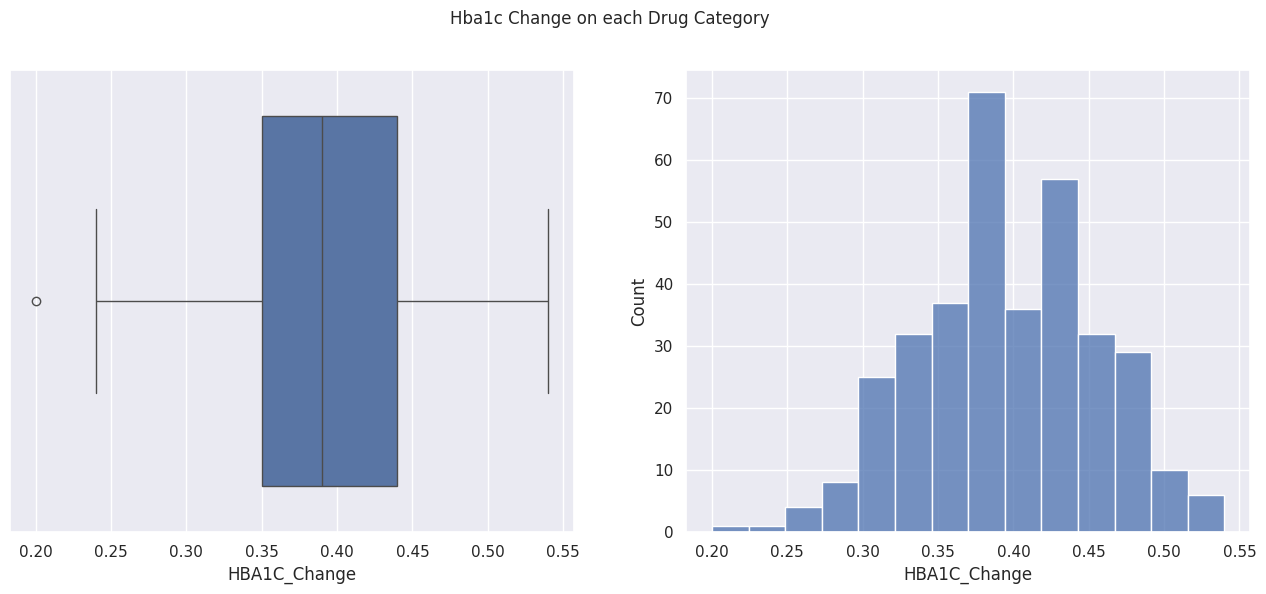

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data = treatments, x = 'HBA1C_Change', ax = axes[0])
sns.histplot(data = treatments, x = 'HBA1C_Change', ax = axes[1])
fig.suptitle('Hba1c Change on each Drug Category', fontsize = 12)
plt.show()

**`Insights on outliers of hba1c Change:`**

**Box Plot:**
- Distribution of HBA1C Changes: The box plot indicates a relatively concentrated distribution of HBA1C changes, with a median around 0.35 and a small interquartile range.
- No Outliers: There are no visible outliers, suggesting a lack of extreme values in the data.

**Histogram:**
- Distribution Shape: The histogram reveals a roughly bell-shaped distribution, suggesting that the majority of individuals experienced similar changes in HBA1C.
- Slight Right Skew: A slight right skew indicates that a few individuals experienced larger decreases in HBA1C compared to the majority.

In [ ]:
q1 = treatments['HBA1C_Change'].quantile(.25)
q3 = treatments['HBA1C_Change'].quantile(.75)
minimum = q1 - (1.5 * (q3-q1))
minimum

0.21500000000000208

In [ ]:
treatments[treatments['HBA1C_Change'] < minimum]

,First_Name,Last_Name,HBA1C_Start,HBA1C_End,HBA1C_Change,Drug_Category,Dose_Start,Dose_End
275,albina,zetticci,7.93,7.73,0.2,auralin,45,51


**`Insights on Outliers of hba1c change:`**
 - The above record suggest the change in the hba1c levels of the patient is `0.2` which is very low comparitive of other patients.
 - It might `look  like an outlier` but actually `it's not`. Because, having low change is not to be considered as outliers as patient's body may be slow for the rection.

- We can confirm it in future by applying some `statistical test` on top of this which can provide us some more additional information on this.

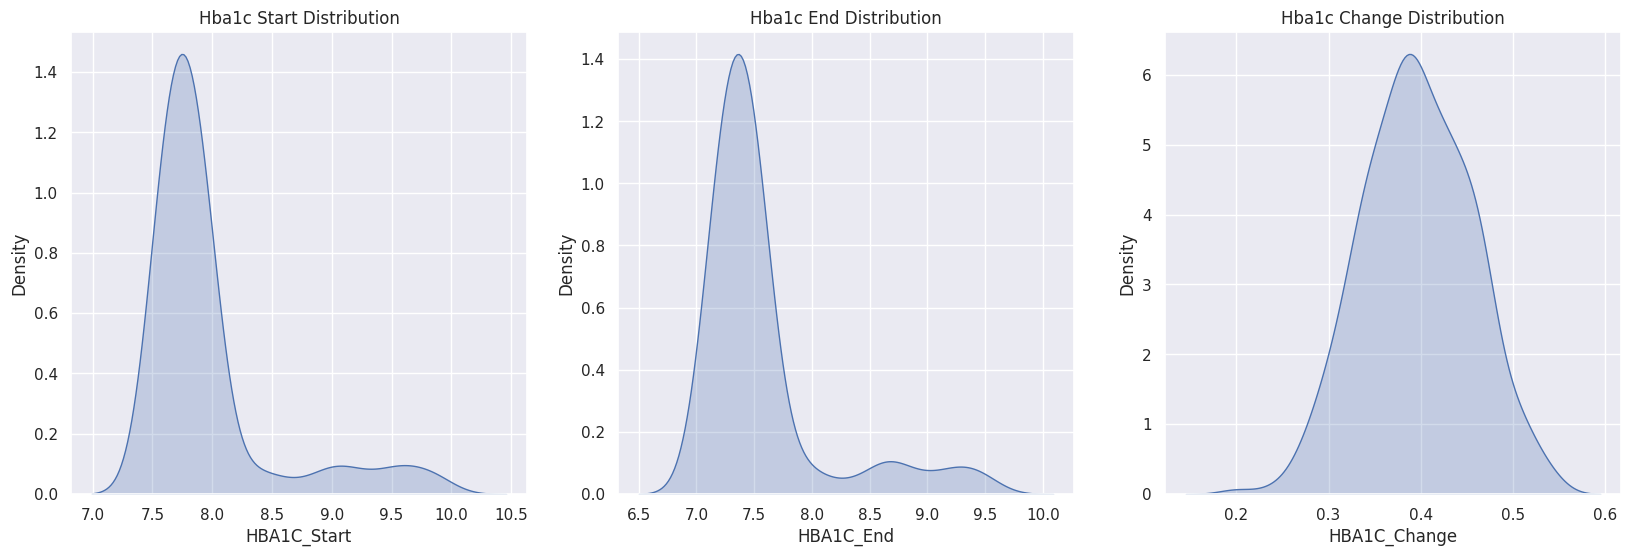

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
sns.kdeplot(data = treatments, x = 'HBA1C_Start', fill = True, ax = axes[0])
axes[0].set_title('Hba1c Start Distribution')
sns.kdeplot(data = treatments, x = 'HBA1C_End', fill = True, ax = axes[1])
axes[1].set_title('Hba1c End Distribution')
sns.kdeplot(data = treatments, x = 'HBA1C_Change', fill = True, ax = axes[2])
axes[2].set_title('Hba1c Change Distribution')
plt.show()

### **`Insights on Hba1c distribution types:`**

**`Hba1c Start Distribution:`**

**Insight:** Most individuals have starting Hba1c values around 7.5 to 8.0%. There is a sharp decline beyond 8.0%, indicating fewer people with higher initial levels.

**Comparison:** The right-skewed distribution resembles a gamma or log-normal distribution, suggesting that while most patients start with moderately elevated Hba1c, some have significantly higher values.

**`Hba1c End Distribution:`**

**Insight:** The distribution peaks around 7.0 to 7.5%, slightly lower than the start, indicating many patients saw a reduction in Hba1c levels post-treatment.

**Comparison:** Similar to the start, this distribution is right-skewed and could be modeled using a gamma or log-normal distribution. The shift toward lower values suggests treatment success.

**`Hba1c Change Distribution:`**

**Insight:** The change distribution peaks around 0.4%, showing that most patients experienced reductions in Hba1c between 0.3 to 0.5%.

**Comparison:** This distribution appears normal, with a symmetric, bell-shaped curve, indicating consistent treatment effects across the population.







# **Reaction Table**

In [ ]:
reactions = pd.read_csv('/content/adverse_reactions.csv')

In [ ]:
reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [ ]:
reactions.rename(columns={'given_name':'First_Name', 'surname':'Last_Name', 'adverse_reaction':'Reactions'}, inplace = True)

In [ ]:
reactions.head()

,First_Name,Last_Name,Reactions
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [ ]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First_Name  34 non-null     object
 1   Last_Name   34 non-null     object
 2   Reactions   34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [ ]:
reactions.describe()

,First_Name,Last_Name,Reactions
count,34,34,34
unique,34,33,6
top,berta,johnson,hypoglycemia
freq,1,2,19


## **Null Values And Duplicates Treatment**

In [ ]:
reactions.isnull().sum()

,0
First_Name,0
Last_Name,0
Reactions,0


In [ ]:
reactions.duplicated().sum()

0

- In this dataset also there are no null values and duplicated values.

## **Adverse Reaction Distribution**

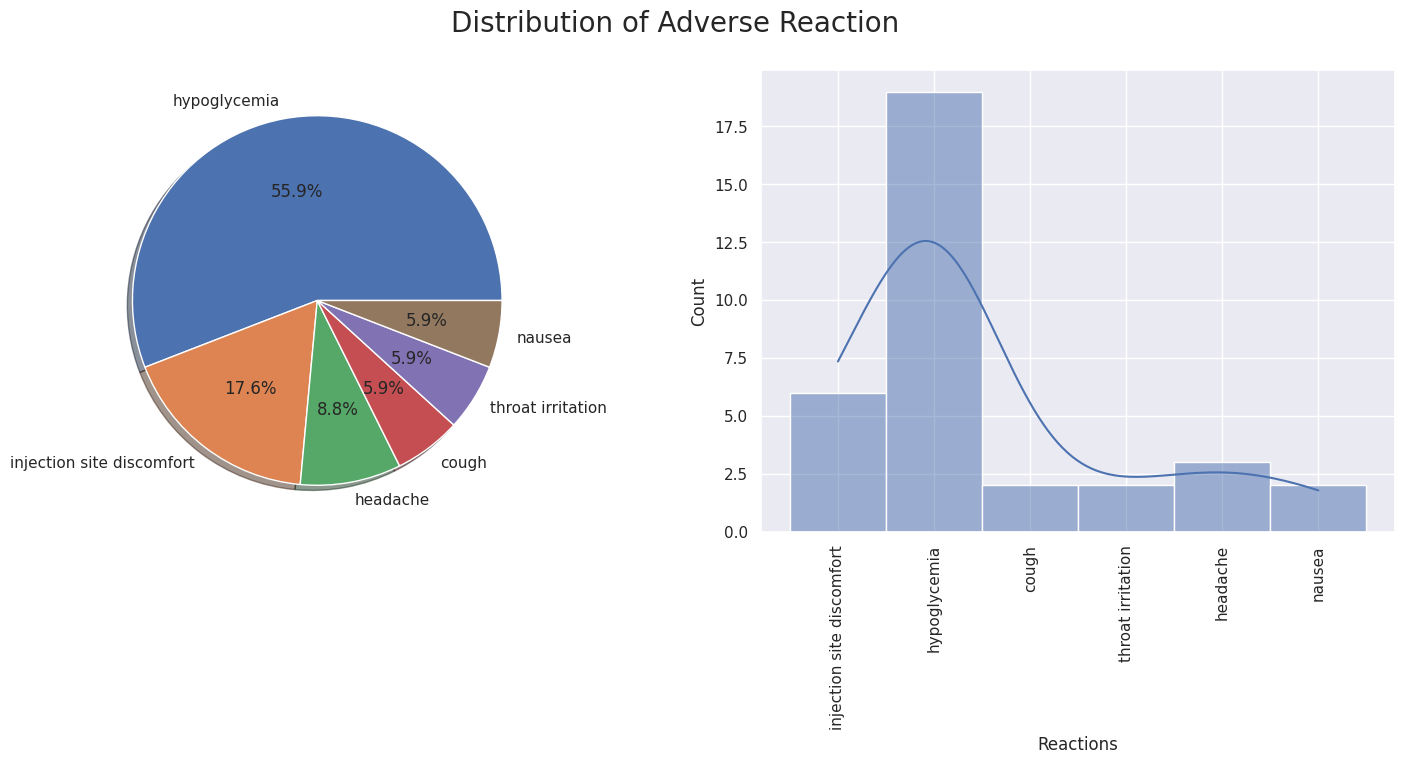

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6))
lab = reactions['Reactions'].value_counts().index
axes[0].pie(reactions['Reactions'].value_counts(), autopct='%1.1f%%', shadow = True, labels=lab)
sns.histplot(data = reactions, x = 'Reactions', ax = axes[1], kde = True)
plt.xticks(rotation = 90)
plt.suptitle('Distribution of Adverse Reaction', fontsize = 20)
plt.show()

- The above plots shows the distribution of adverse reactions for a particular medication or treatment. The largest percentage of adverse reactions is `hypoglycemia`, accounting for `55.9%` of all reported cases. Other common side effects include `injection site discomfort (17.6%), nausea (5.9%), throat irritation (5.9%), cough (5.9%), and headache (8.8%)`.

## **Merged Table**

In [ ]:
merged_tab = pd.merge(treatments, reactions, on = ['First_Name', 'Last_Name'], how = 'inner')

In [ ]:
merged_tab.head()

,First_Name,Last_Name,HBA1C_Start,HBA1C_End,HBA1C_Change,Drug_Category,Dose_Start,Dose_End,Reactions
0,elliot,richardson,7.56,7.09,0.47,novodra,40,45,hypoglycemia
1,jasmine,sykes,7.56,7.18,0.38,novodra,42,44,hypoglycemia
2,joseph,day,7.70,7.19,0.51,auralin,29,36,hypoglycemia
3,clinton,miller,7.79,7.40,0.39,auralin,42,51,throat irritation
4,krisztina,magyar,7.52,7.01,0.51,novodra,32,27,hypoglycemia


In [ ]:
merged_tab.shape

(34, 9)

### **Distribution Of Adverse Reaction Among Drug Categories**

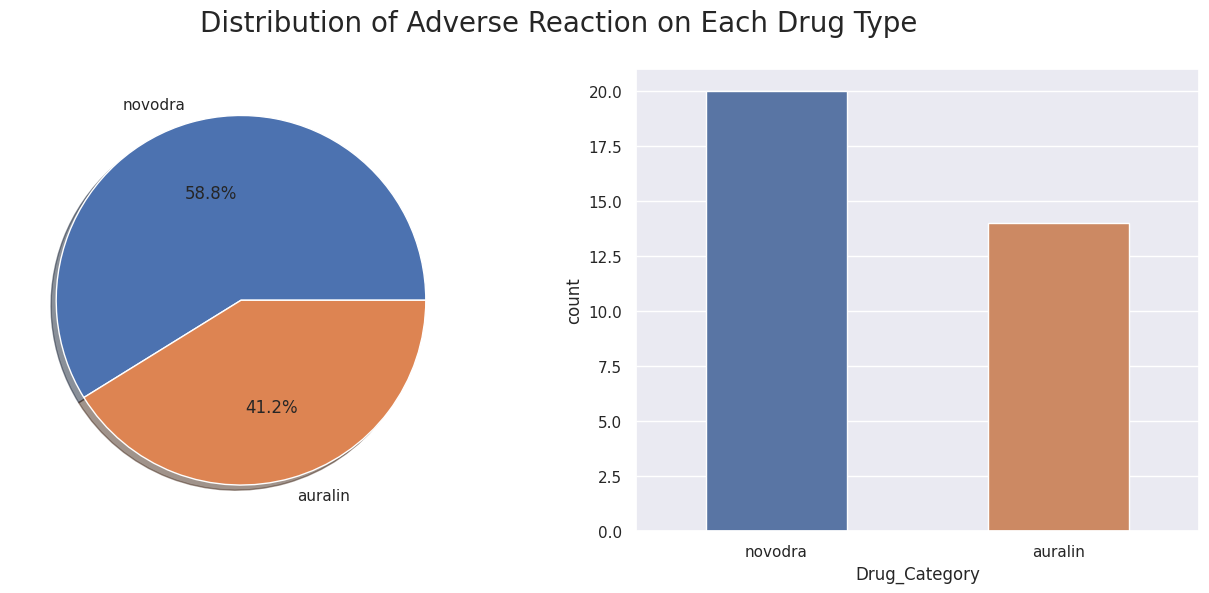

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
lab = merged_tab['Drug_Category'].value_counts().index
axes[0].pie(merged_tab['Drug_Category'].value_counts(), autopct='%1.1f%%', shadow = True, labels=lab)
sns.countplot(data = merged_tab, x = 'Drug_Category', hue = 'Drug_Category', ax = axes[1], width=0.5)
plt.suptitle('Distribution of Adverse Reaction on Each Drug Type', fontsize = 20)
plt.show()

**`Insights on Adverse Reactions:`**
- The pie plot shows the distribution of adverse reactions for two medications, `novodra and auralin`. `Novodra` accounts for `58.8%` of all reported adverse reactions, while `auralin` accounts for the remaining `41.2%.`

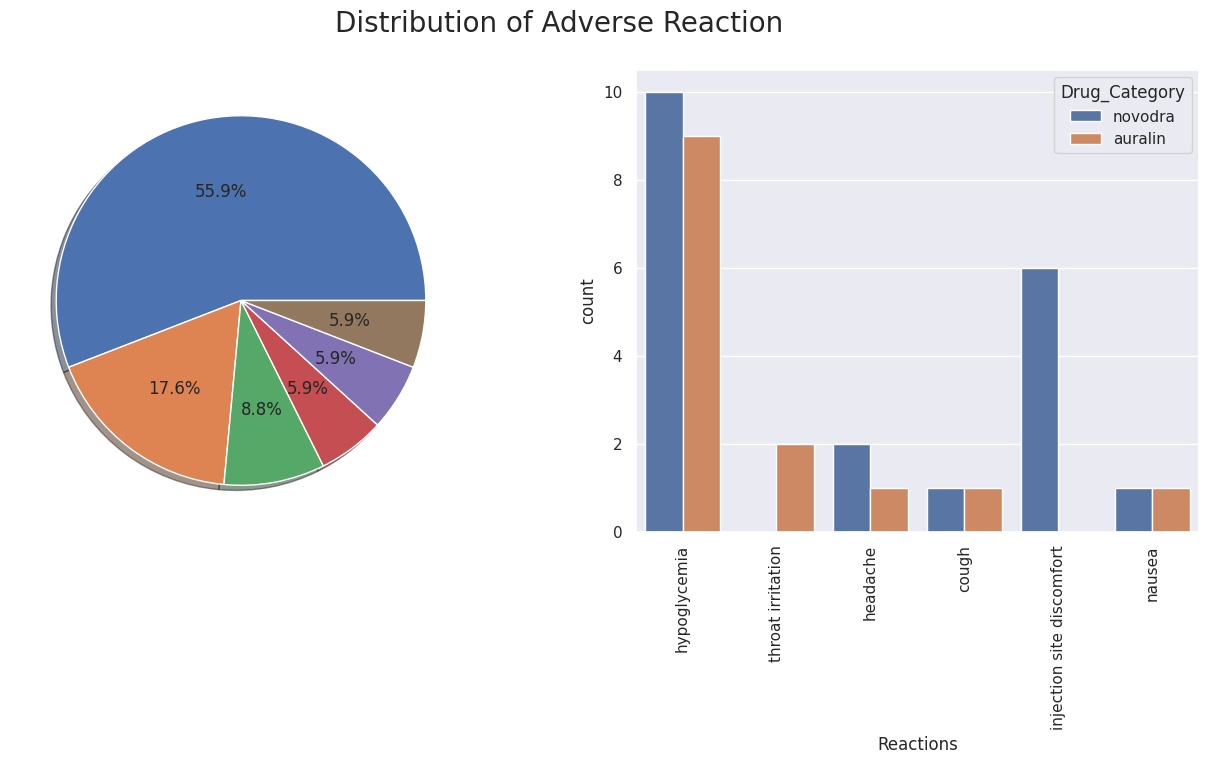

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
axes[0].pie(merged_tab['Reactions'].value_counts(), autopct='%1.1f%%', shadow = True)
sns.countplot(data = merged_tab, x = 'Reactions', hue = 'Drug_Category', ax = axes[1])
plt.suptitle('Distribution of Adverse Reaction', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**`Insights on Adverse Reactions:`**

- The bar chart shows the distribution of adverse reactions for two drug categories:

1. `Hypoglycemia` is the most common adverse reaction for both drug categories, with `novodra` having a `higher count` compared to `auralin.`
2. `Throat irritation, headache, and cough` are also reported for both drug categories, but with lower counts compared to `hypoglycemia`.
3. `Injection site discomfort and nausea` are relatively `rare adverse reactions` for both `drug categories`.
4. `Novodra` is associated with a `higher count of adverse reactions overall compared to auralin`, particularly for `hypoglycemia and throat irritation`.



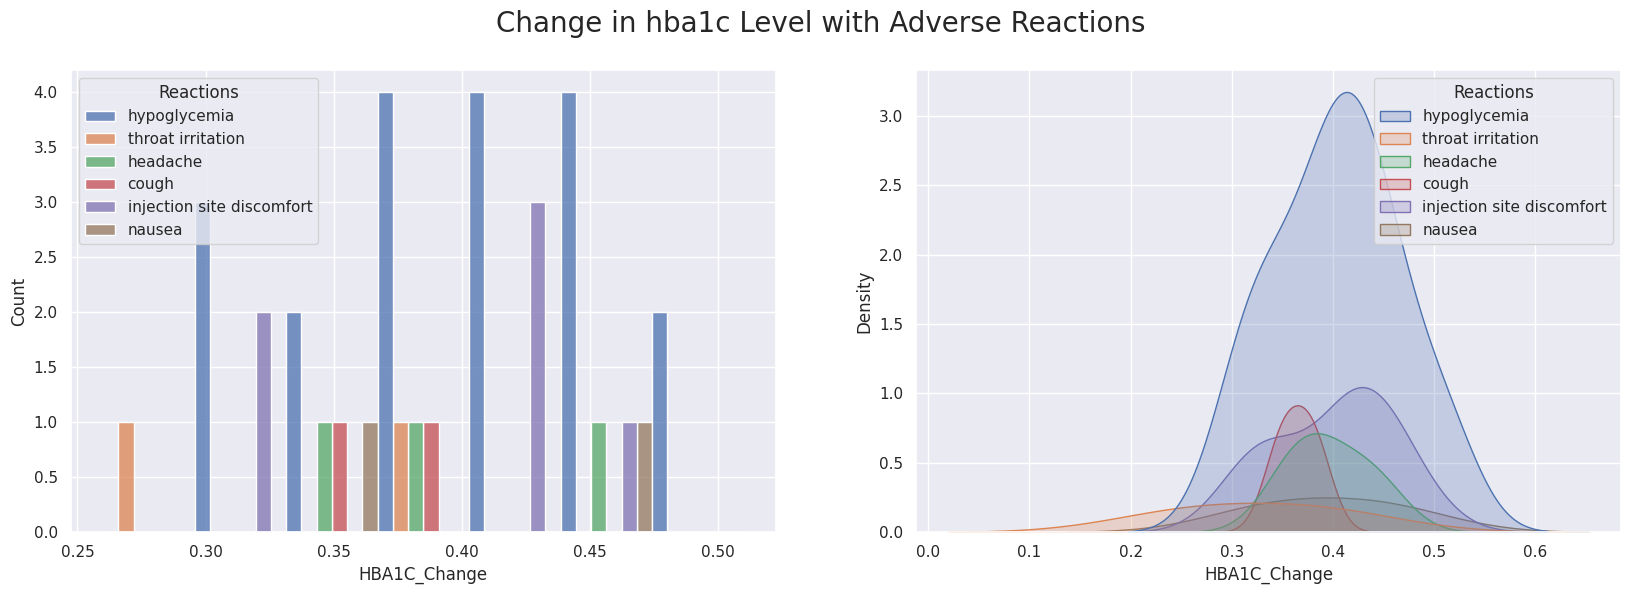

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data = merged_tab, x = 'HBA1C_Change', hue = 'Reactions', multiple = 'dodge', ax = axes[0])
sns.kdeplot(data = merged_tab, x = 'HBA1C_Change', hue = 'Reactions', fill = True, ax = axes[1])
plt.suptitle('Change in hba1c Level with Adverse Reactions', fontsize = 20)
plt.show()

**`Insights on hba1c change with reactions:`**

**`Bar Plot:`**
- The bar plot illustrates the frequency of different changes in HBA1C levels associated with various adverse reactions.
- Hypoglycemia and throat irritation appear to be the most frequent reactions linked to significant decreases in HBA1C levels.
- Other reactions, such as headache, cough, and nausea, seem to be less frequently associated with substantial changes in HBA1C.

**`Density Plot:`**

- The density plot provides a visual representation of the probability density functions for HBA1C changes associated with each reaction. The overlapping distributions indicate that the effects of different reactions on HBA1C levels can be quite similar.
- Some reactions, like hypoglycemia, show distinct peaks in their density plots, suggesting a more concentrated effect on HBA1C.
- The tails of the distributions overlap, indicating that while some reactions may have a stronger tendency to lower HBA1C, there is still a chance for other reactions to have a similar effect.

In [ ]:
reactions.head()

,First_Name,Last_Name,Reactions
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [ ]:
merged_tab_2 = pd.merge(data, reactions, on = ['First_Name', 'Last_Name'], how='inner')

In [ ]:
merged_tab_2.head()

,ID,First_Name,Last_Name,Gender,Country,State,City,Postal_Code,Address,Contact,Date_of_Birth,Weight,Height,BMI,BMI_Category,Age,Reactions
0,8,xiuxiu,chang,female,United States,CA,Morgan Hill,95037.0,2687 Black Oak Hollow Road,XiuxiuChang@einrot.com1 408 778 3236,1958-08-13,158.0,60,30.9,Obesity I,61,hypoglycemia
1,12,abdul-nur,isa,male,United States,TN,Brentwood,37027.0,1092 Farm Meadow Drive,Abdul-NurMummarIsa@rhyta.com1 931 207 0839,1954-02-03,238.7,73,31.5,Obesity I,65,hypoglycemia
2,14,anenechi,chidi,female,United States,AL,Birmingham,35203.0,826 Broad Street,AnenechiChidi@armyspy.com+1 (205) 417-8095,1961-03-07,228.4,67,35.8,Obesity II,58,hypoglycemia
3,25,jakob,jakobsen,male,United States,New York,Port Jervis,12771.0,648 Old Dear Lane,JakobCJakobsen@einrot.com+1 (845) 858-7707,1985-08-01,155.8,67,24.4,Normal weight,34,hypoglycemia
4,38,albinca,komavec,female,United States,SD,Huron,57350.0,1257 Elsie Drive,AlbincaKomavec@rhyta.com+1 (605) 204-6572,1986-06-05,189.9,66,30.6,Obesity I,33,hypoglycemia


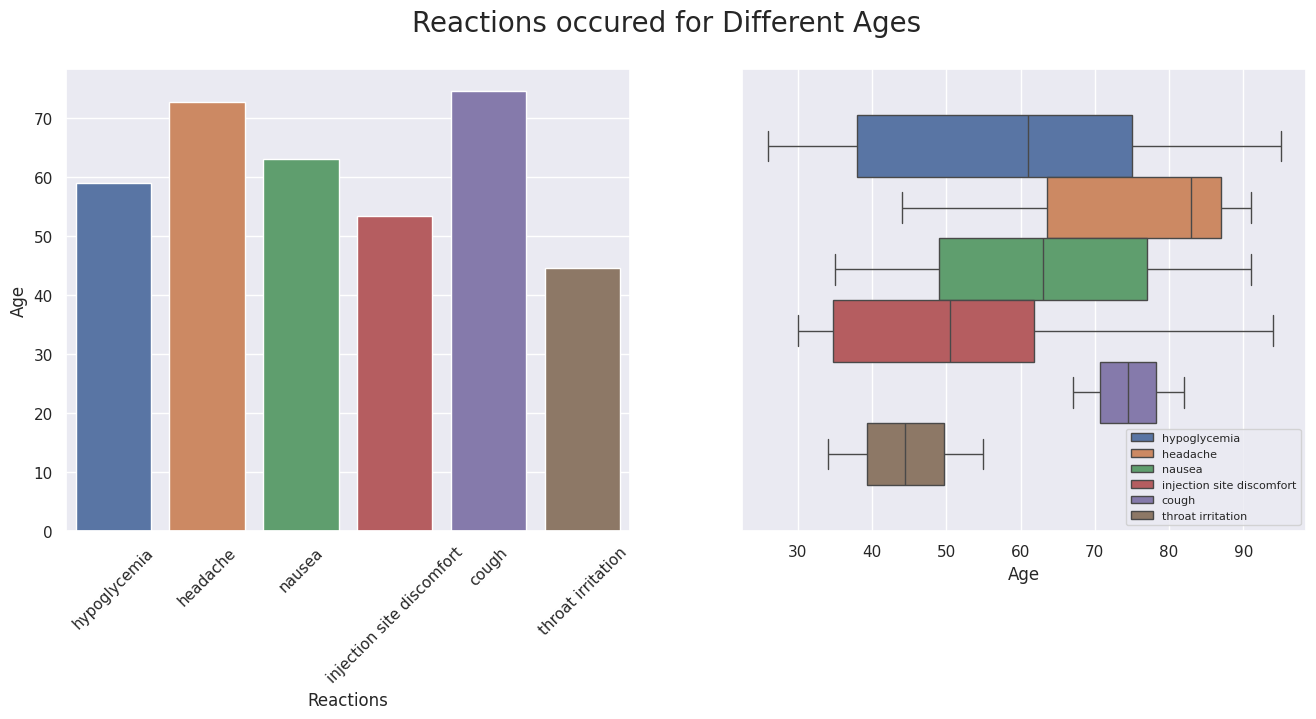

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data = merged_tab_2, x = 'Reactions', y = 'Age', hue = 'Reactions', errorbar= None, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 45)
sns.boxplot(data = merged_tab_2, x = 'Age', hue = 'Reactions', ax = axes[1])
axes[1].legend(loc='lower right', fontsize = 8)
plt.suptitle('Reactions occured for Different Ages', fontsize = 20)
plt.show()

**`Insights on Reactions occured for Different Ages:`**

**`Bar Plot:`**

**Most Common Reactions:** Hypoglycemia and headache were the most commonly reported reactions across all age groups.

**Age-Specific Reactions:** The frequency of injection site discomfort and throat irritation seems to be higher in younger age groups.

**Decreasing Reactions:** Cough and nausea were less frequently reported in older age groups.

**`Box Plot:`**

**Age Variation in Reaction Severity:** The box plots show that the severity of reactions (as measured by the interquartile range) varies across different age groups for each type of reaction.

**Outliers:** There are some outliers present, especially for hypoglycemia and headache, indicating that a few individuals experienced significantly more severe reactions than others.

**Overall Trends:** In general, the box plots suggest that the severity of most reactions tends to decrease with increasing age.